# Principles of Data Science

## Name: Revati Jaidatta Chavare (22533031)

## Section-1 Data Understanding and exploration

<I>Importing required libraries..</I>

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
sns.set(
    rc={ "figure.figsize": (14,6) },
    style="ticks", context="notebook", font_scale=1.2
)

<I>Loading dataset and storing it into 'advert'</I>

In [391]:
advert=pd.read_csv('adverts.csv')

In [392]:
advert.head(5)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [393]:
advert.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [394]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


### 1.1 Identifying missing/ null values

<I> Checking for null values in the raw dataset, using isna() function and sum() function to get the total number of null values in each column.</I>

In [395]:
advert.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

<I>Here, we can see mileage, reg_code, standard_colour, year_of_registration, body_type and fuel_type contains null values.</I>

<I>Using heatmap to visualise null values in the dataset.</I>

<AxesSubplot:>

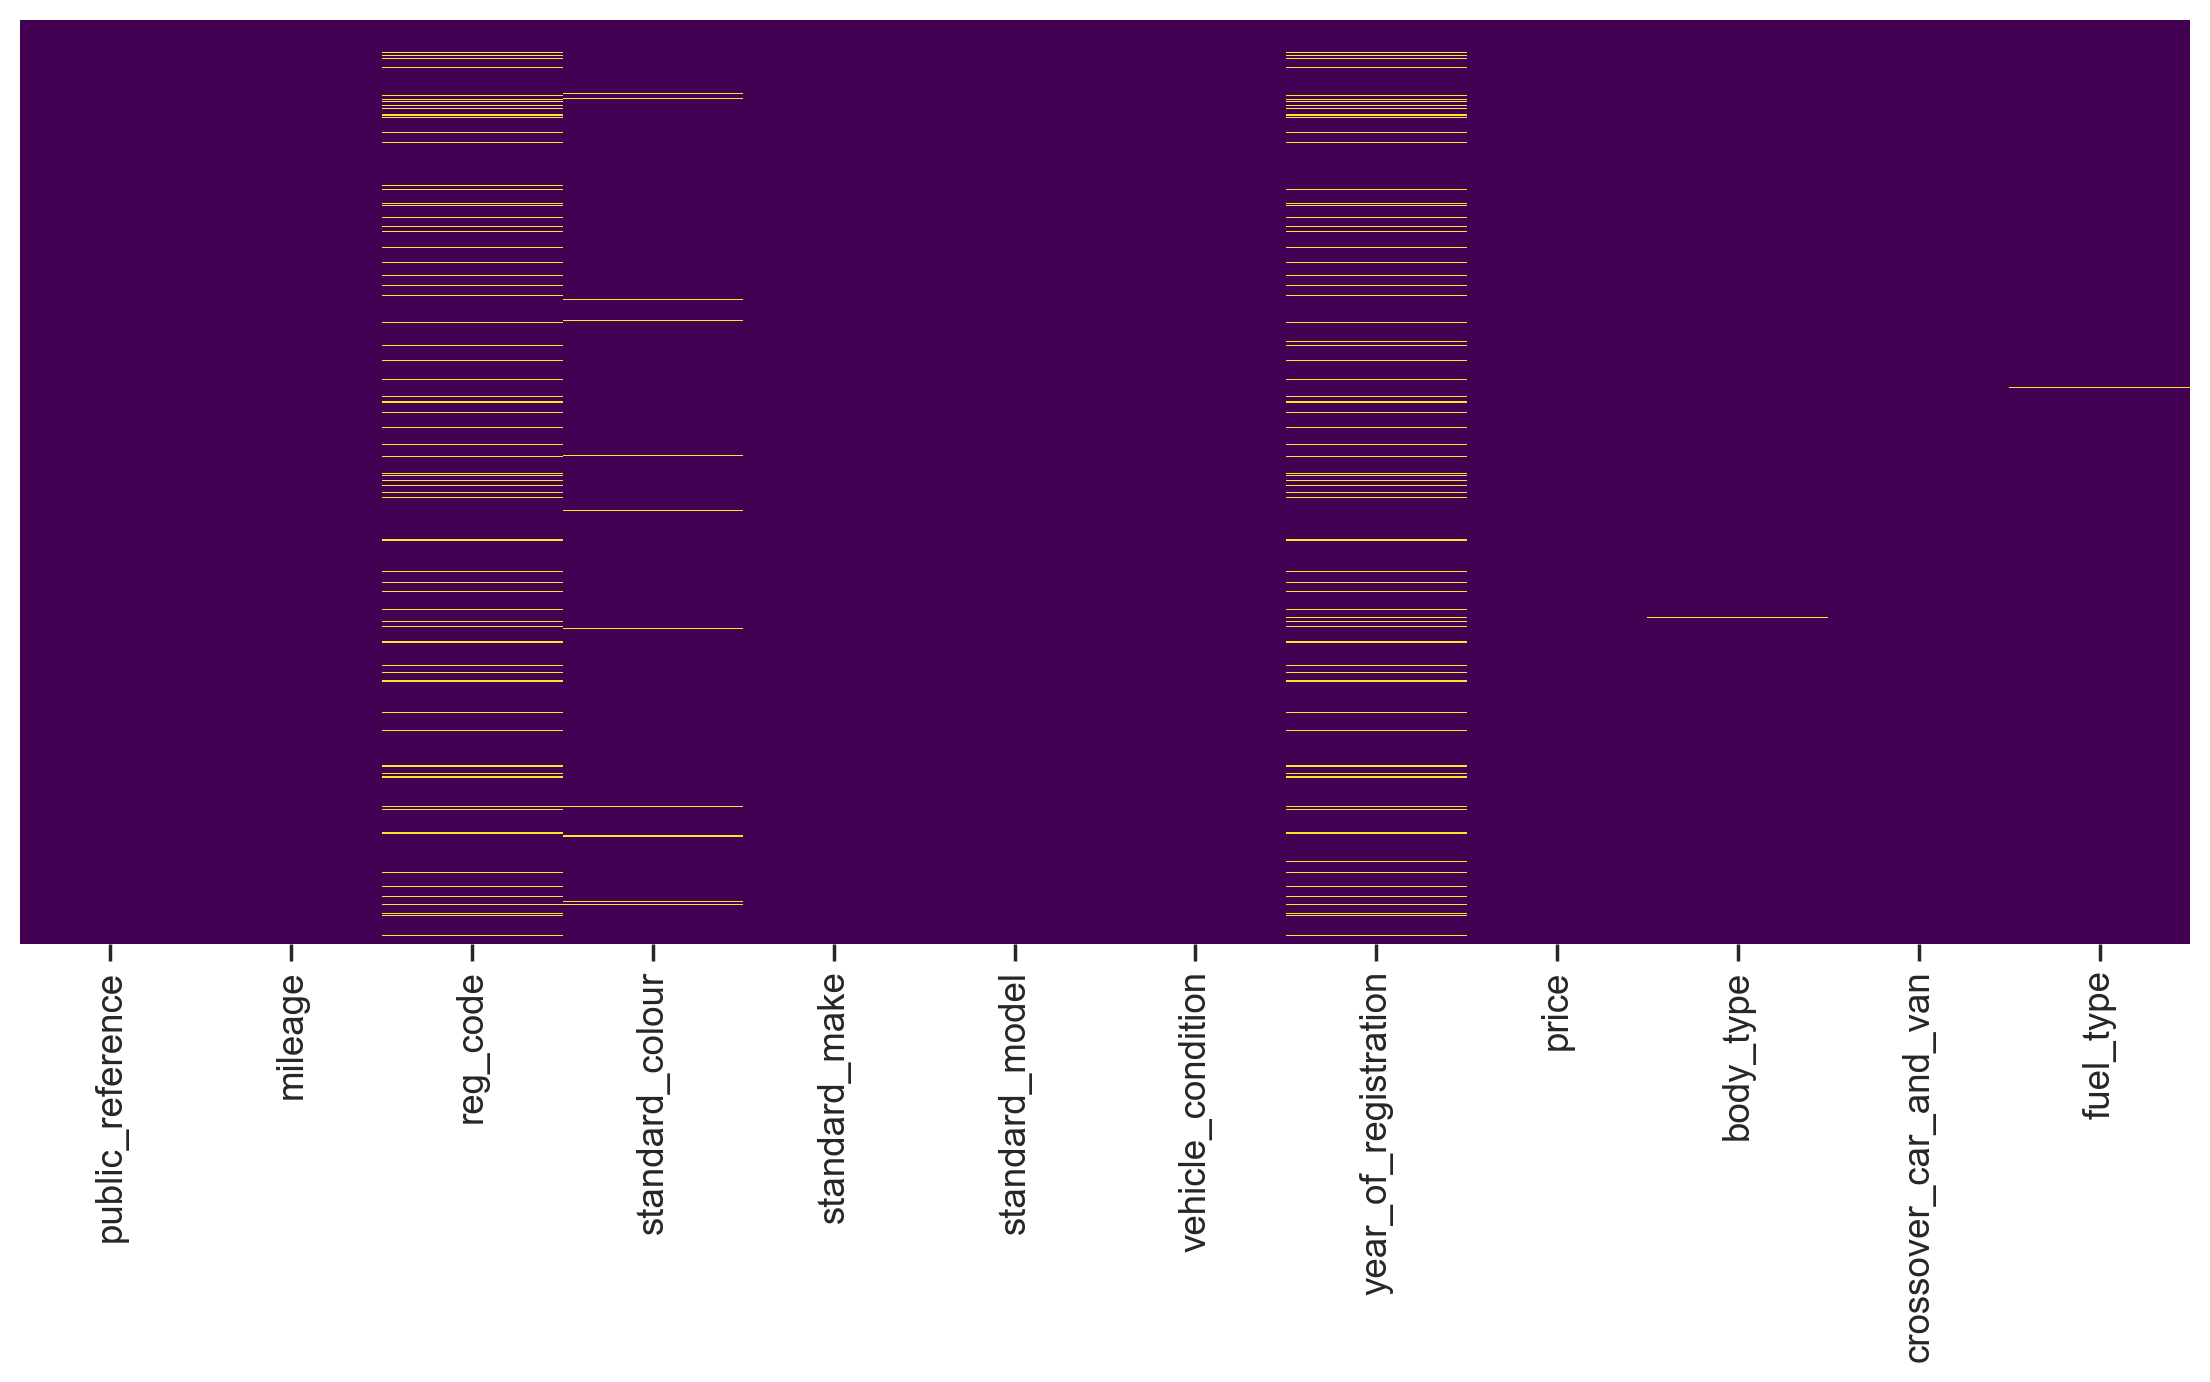

In [396]:
sns.heatmap(advert.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 1.2 Identifying outliers or noise

<I>An outlier is a distant observation in the dataset, it basically falls outside of the usual observation and can be easily spotted using boxplot or scatterplot.
Here, we are looking for outliers in price, mileage and year of registration using boxplot and scatterplot respectively.</I>

<AxesSubplot:>

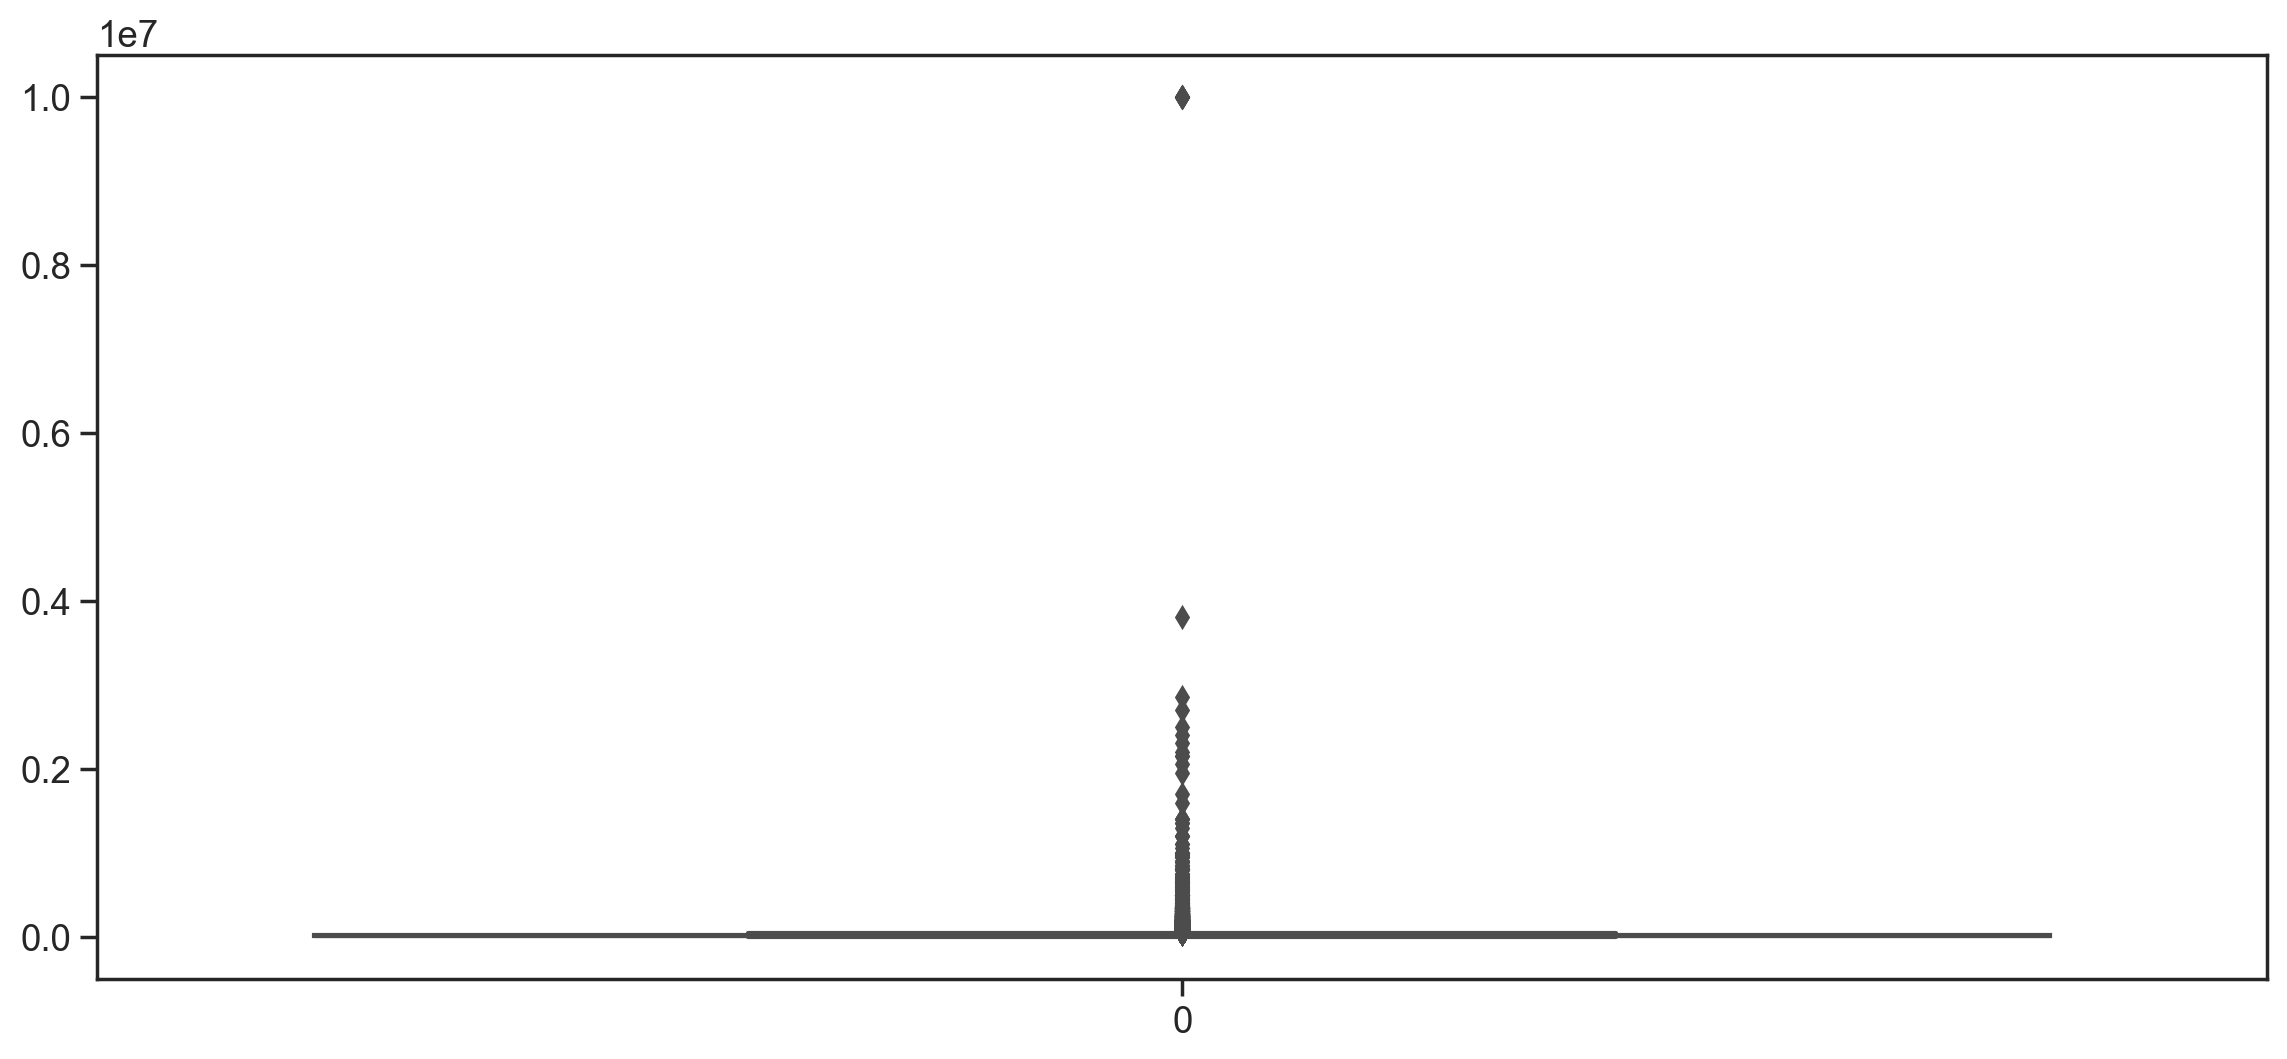

In [397]:
sns.boxplot(data=advert['price'])

<AxesSubplot:ylabel='year_of_registration'>

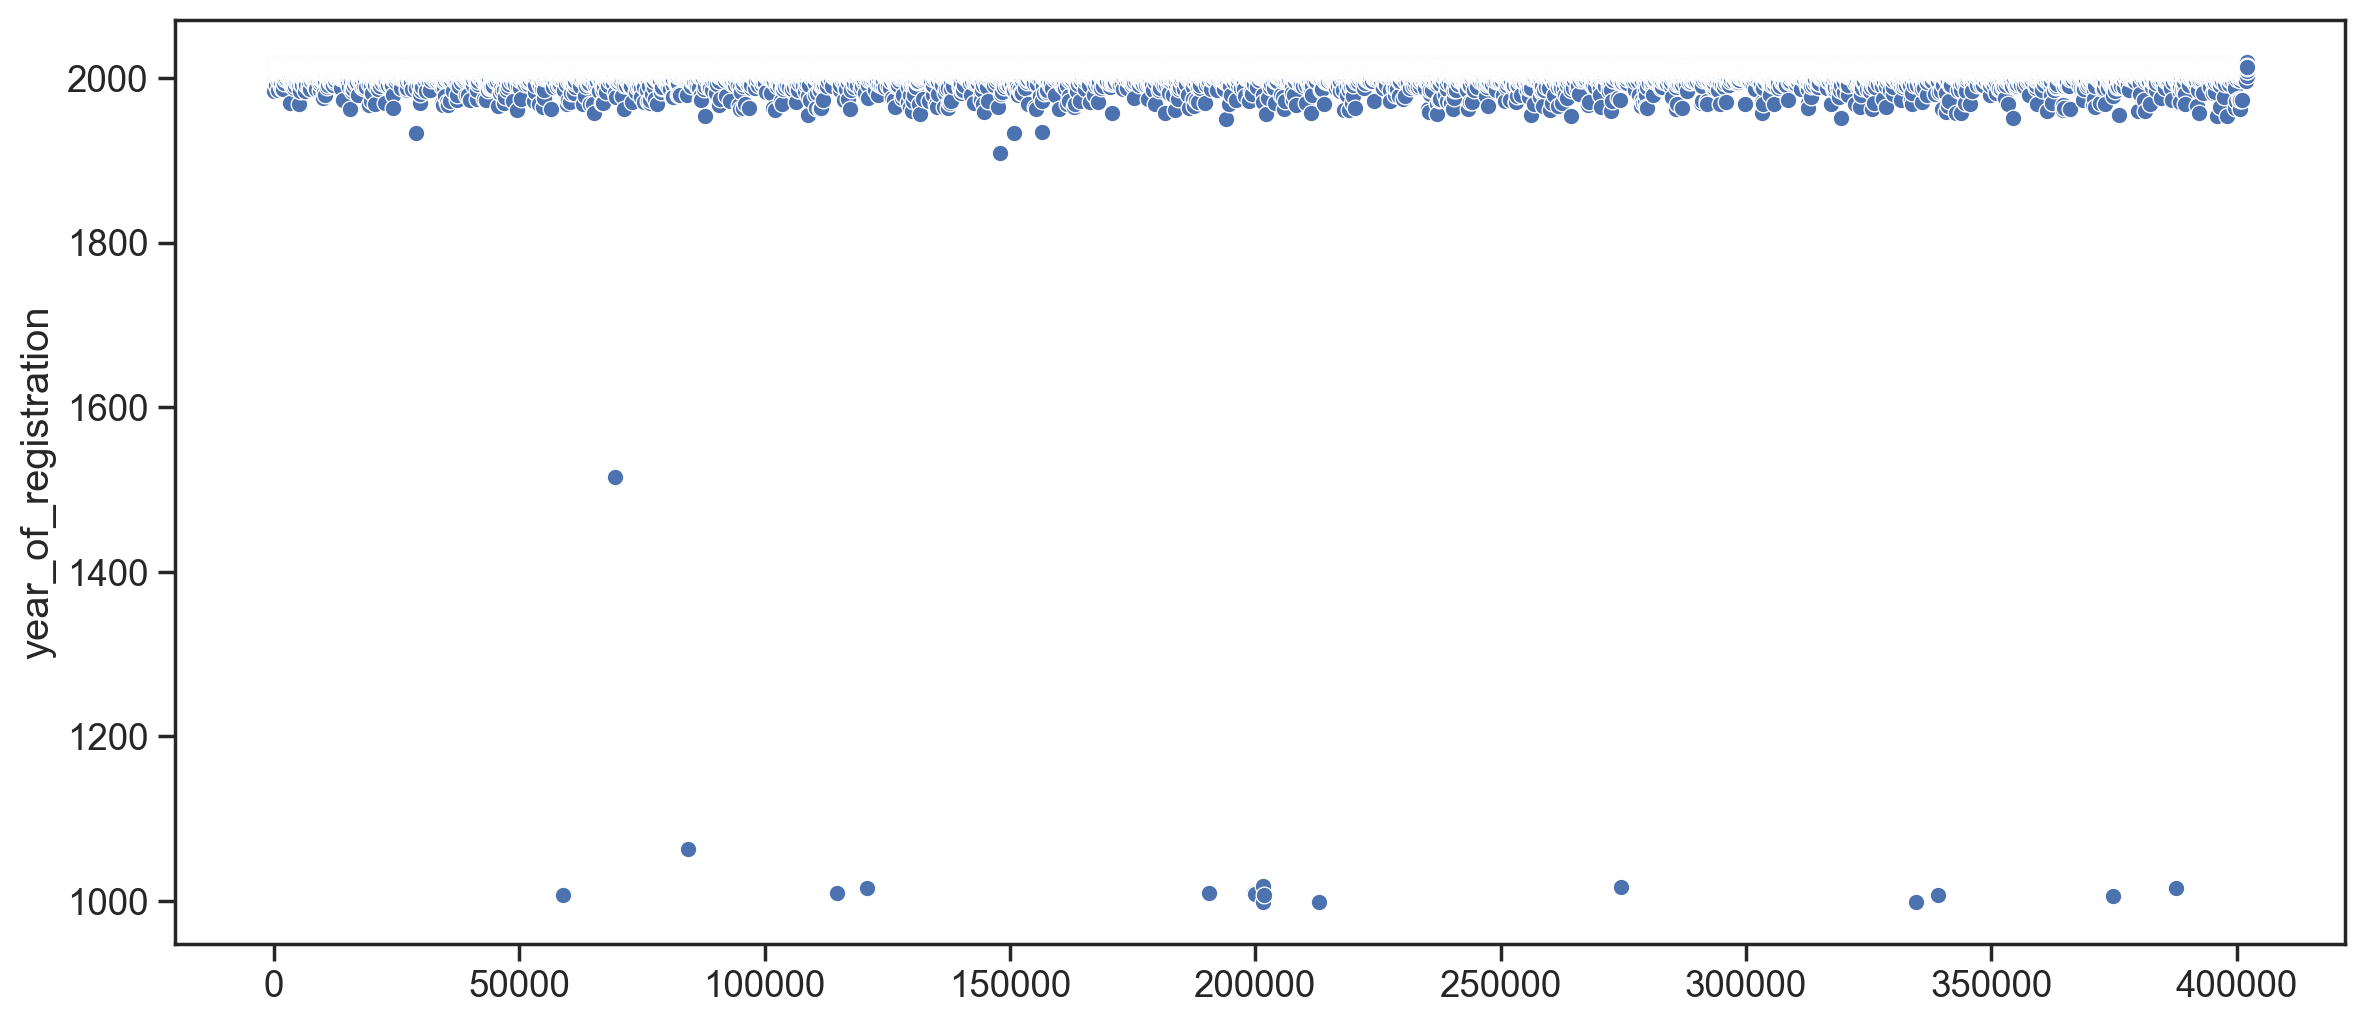

In [398]:
sns.scatterplot(data=advert['year_of_registration'])

<AxesSubplot:>

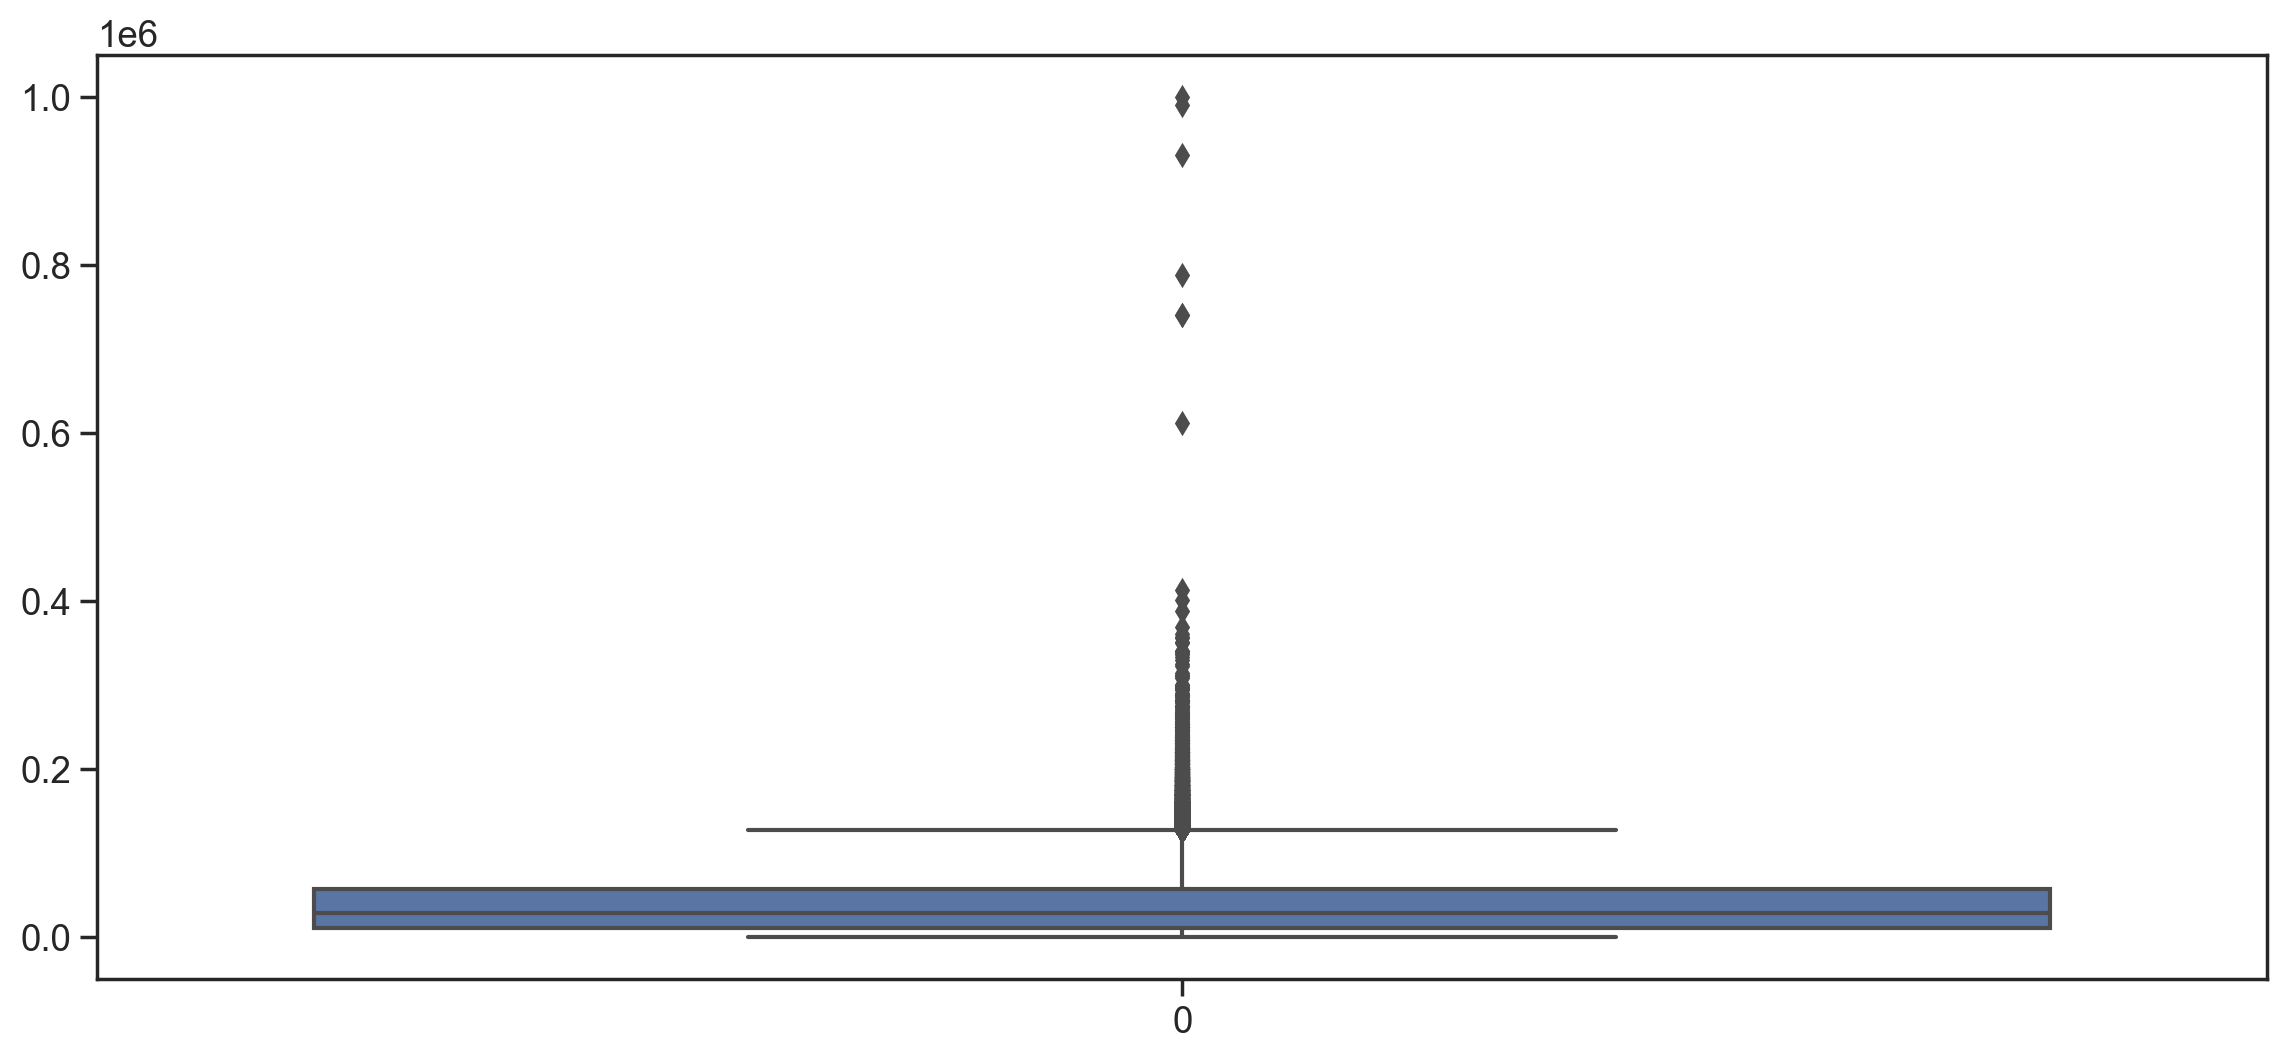

In [399]:
sns.boxplot(data=advert['mileage'])

<I>After carefully observing the plots we are now sure that there are outliers in mileage, price and year of registration and we'll have to deal with it in further steps.</I>

### 1.3 Identifying features

<I>Many features in the dataset are not that important and we can drop those features, and work only on potential features to predict the price of a car.</I>

In [400]:
advert.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [401]:
advert.corr()['price']

public_reference        -0.052344
mileage                 -0.160204
year_of_registration     0.102341
price                    1.000000
crossover_car_and_van    0.010402
Name: price, dtype: float64

<I>A quick look at the correlation between price and other numerical features in the datset. This clearly shows that year
-of_registration could play a vital role in determining the price of a car, it has a significantly high correlation with price comparative to other features.</I>

In [459]:
Total_no_of_cars=advert.groupby(['standard_make','standard_model']).size().reset_index().rename(columns={0:'Total number of cars'})

In [460]:
Total_no_of_cars

standard_make standard_model  Total number of cars
0               AC          Cobra                     3
1               AK          Cobra                     1
2           Abarth     124 Spider                    61
3           Abarth            500                   109
4           Abarth           500C                    27
...            ...            ...                   ...
1212     Westfield             Se                     1
1213     Westfield            Sei                     1
1214     Westfield          Sport                     1
1215      Wolseley          6/110                     1
1216         Zenos            E10                     2

[1217 rows x 3 columns]

<I>Using group_by() function, here we got the total number of cars of each standard_make and standard_model in the dataset.
</I>

## Section-2 Data processing

### 2.1 Handling missing/ null values

<I>As mentioned earlier, we can drop some features and work on potential fetaures.
So, here we are dropping public_reference,  reg_code, standard_colour,standard_make,standard_model and crossover_car_and_van.
Features we are dealing with:
1. Mileage
2. Vehicle condition
3. Year of registration
4. Body type
5. Fuel type

    We are working on to predict the price of a car, so price is our target and all above mentioned fetaures are predictors.</I>

In [410]:
sample_advert=advert.drop(columns=['public_reference','reg_code','standard_colour','standard_make','standard_model','crossover_car_and_van'], axis=1)

In [411]:
sample_advert.isna().sum()

mileage                   127
vehicle_condition           0
year_of_registration    33311
price                       0
body_type                 837
fuel_type                 601
dtype: int64

<I>Above code shows the sum of null values in our potential features, so now we'll deal with the missing values in those features.
Data is important and we can't afford loosing any of it. However we are not using drop() function neither to drop a column nor a row.
1. For Mileage, year of registration and price we are replacing the null values with the mean of the entire column using fillna() and mean() function.
    

</I>


In [412]:
sample_advert['mileage']=sample_advert['mileage'].fillna(sample_advert.mileage.mean())

In [413]:
sample_advert['year_of_registration']=sample_advert['year_of_registration'].fillna(sample_advert.year_of_registration.mean()).astype(int)

In [414]:
sample_advert['price']=sample_advert['price'].fillna(sample_advert.price.mean())

2. To deal with missing values in body_type and fuel_type, we have replaced the null values with the maximum number of onservations in that columns.
    For eg. In case of body_type, maximum number of body_type is 'Hatchback', so we have replaced it with 'Hatchback'. 

In [415]:
sample_advert['body_type'].value_counts()

Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

In [416]:
sample_advert['body_type']=sample_advert['body_type'].fillna("Hatchback")

In [417]:
sample_advert['fuel_type'].value_counts()

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [418]:
sample_advert['fuel_type']=sample_advert['fuel_type'].fillna("Petrol")

In [419]:
sample_advert.isna().sum()

mileage                 0
vehicle_condition       0
year_of_registration    0
price                   0
body_type               0
fuel_type               0
dtype: int64

<I> Now, as we can see all the missing values are removed.</I>

### 2.2 Handling outliers

<I>To deal with the outliers, we can use two techniques Z-score and Interquantile range (IQR).</I>

IQR= Q3-Q1
It is basically the first quartile subtracted from the third quartile and measures the dispersion similar to standard deviation.

<I>Here we are dealing with the outliers in year_of_registration.</I> 

In [420]:
sample_advert['year_of_registration'].describe()

count    402005.000000
mean       2015.005691
std           7.625632
min         999.000000
25%        2014.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [421]:
upper_boundary=sample_advert['year_of_registration'].mean()+3*sample_advert['year_of_registration'].std()
lower_boundary=sample_advert['year_of_registration'].mean()-3*sample_advert['year_of_registration'].std()
print(lower_boundary),print(upper_boundary),print(sample_advert['year_of_registration'].mean())

1992.1287952316097
2037.8825877113886
2015.0056914714992


(None, None, None)

In [422]:
IQR=sample_advert.year_of_registration.quantile(0.75)-sample_advert.year_of_registration.quantile(0.25)

In [423]:
lower_bridge=sample_advert['year_of_registration'].quantile(0.25)-(IQR*1.5)
upper_bridge=sample_advert['year_of_registration'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

2008.0
2024.0


(None, None)

<I>After using the IQR technique, now we got the minimum and maximum year_of_registration. We can only work on those years.</I>

In [424]:
sample_advert=sample_advert.query("year_of_registration >2007 and year_of_registration<2024")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_of_registration'>

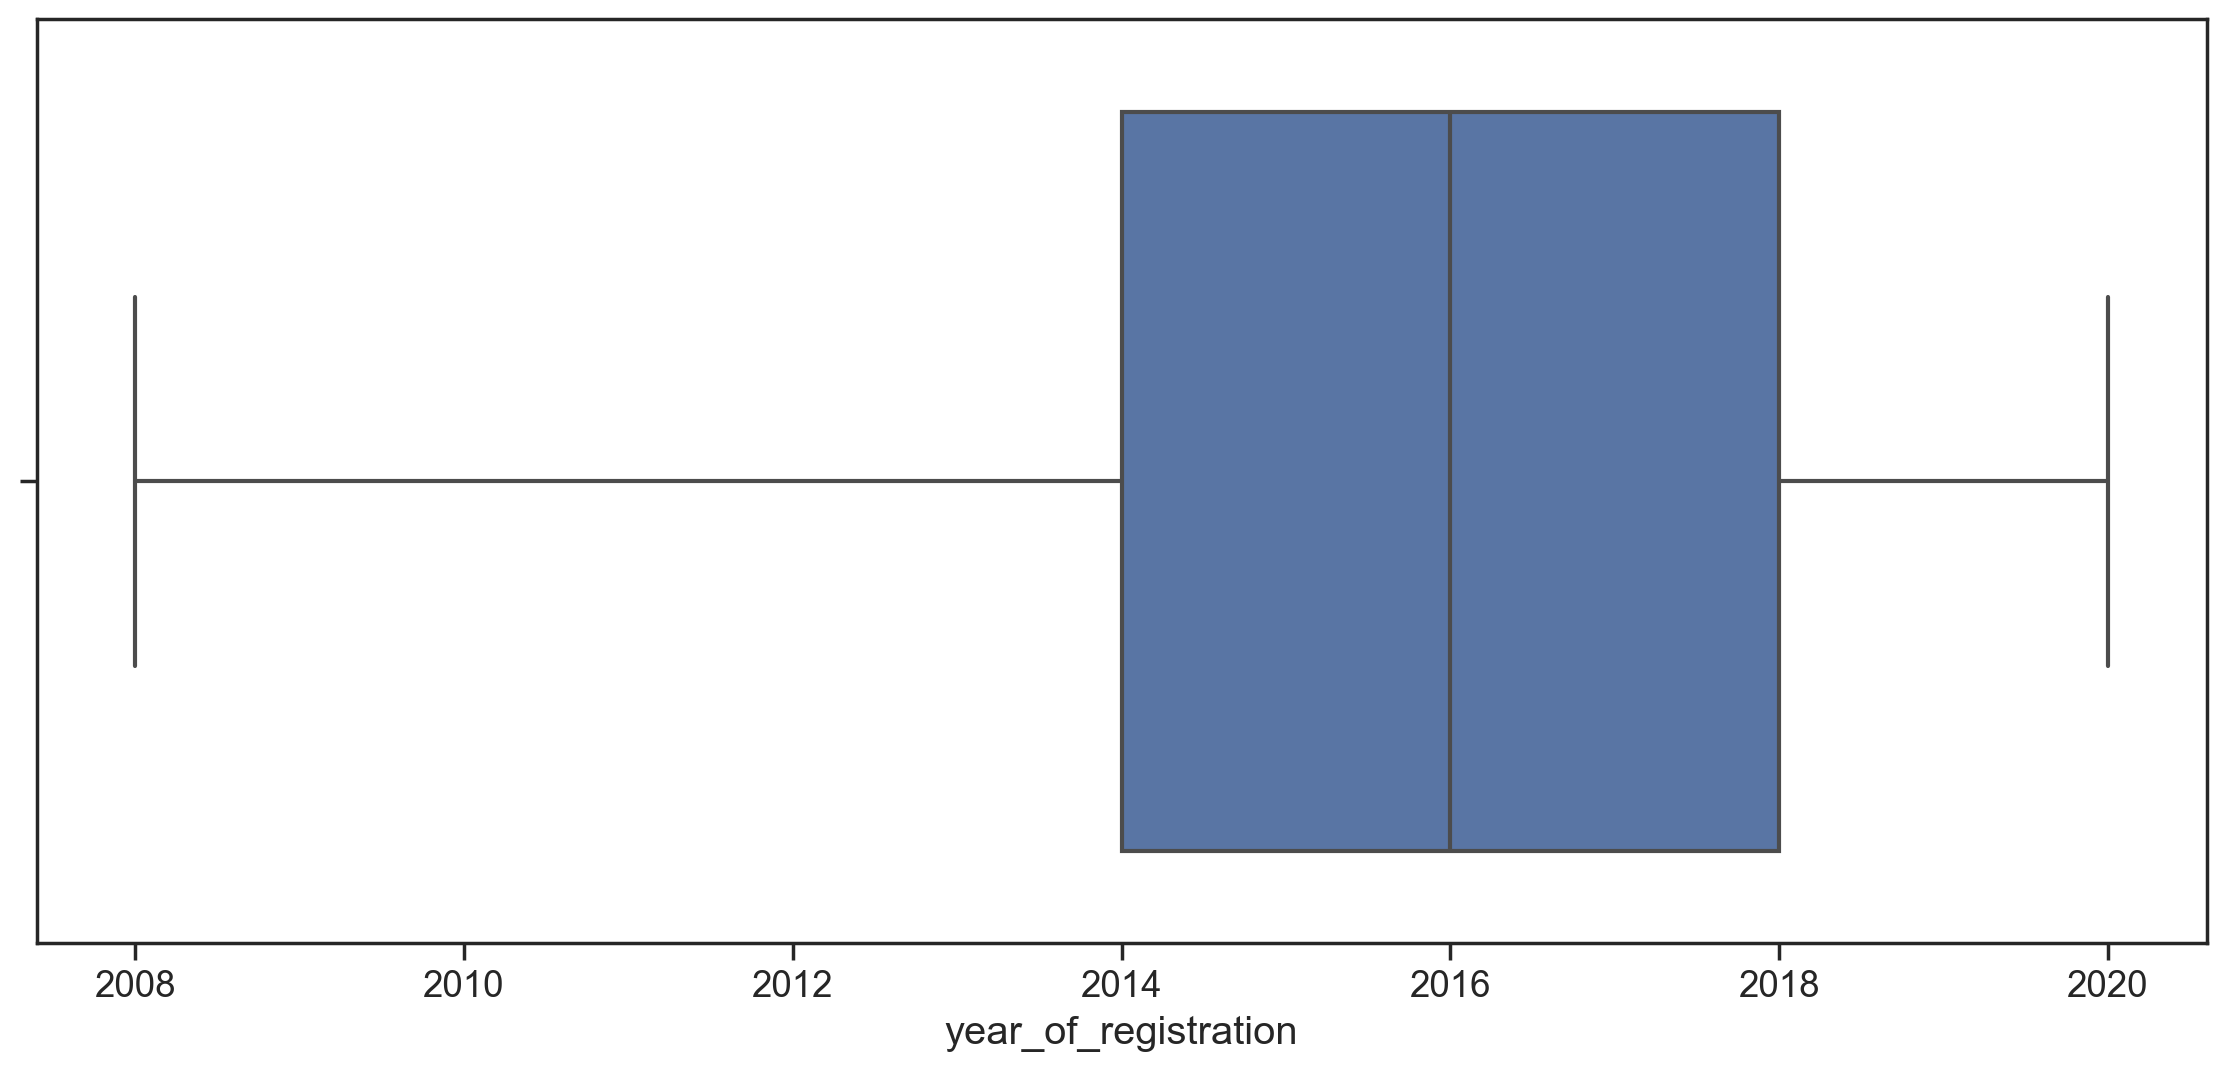

In [426]:
sns.boxplot(sample_advert['year_of_registration'])

<I>The outliers in year_of_registration is removed as seen in the boxplot above.</I>

In [427]:
sample_advert['price'].describe()

count    3.786670e+05
mean     1.790488e+04
std      4.693150e+04
min      2.500000e+02
25%      8.000000e+03
50%      1.300000e+04
75%      2.069500e+04
max      9.999999e+06
Name: price, dtype: float64

In [428]:
upper_boundary=sample_advert['price'].mean()+3*sample_advert['price'].std()
lower_boundary=sample_advert['price'].mean()-3*sample_advert['price'].std()
print(lower_boundary),print(upper_boundary),print(sample_advert['price'].mean())

-122889.60707963898
158699.36707456858
17904.87999746479


(None, None, None)

In [429]:
IQR=sample_advert.price.quantile(0.75)-sample_advert.price.quantile(0.25)

In [430]:
lower_bridge=sample_advert['price'].quantile(0.25)-(IQR*1.5)
upper_bridge=sample_advert['price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-11042.5
39737.5


(None, None)

<AxesSubplot:ylabel='price'>

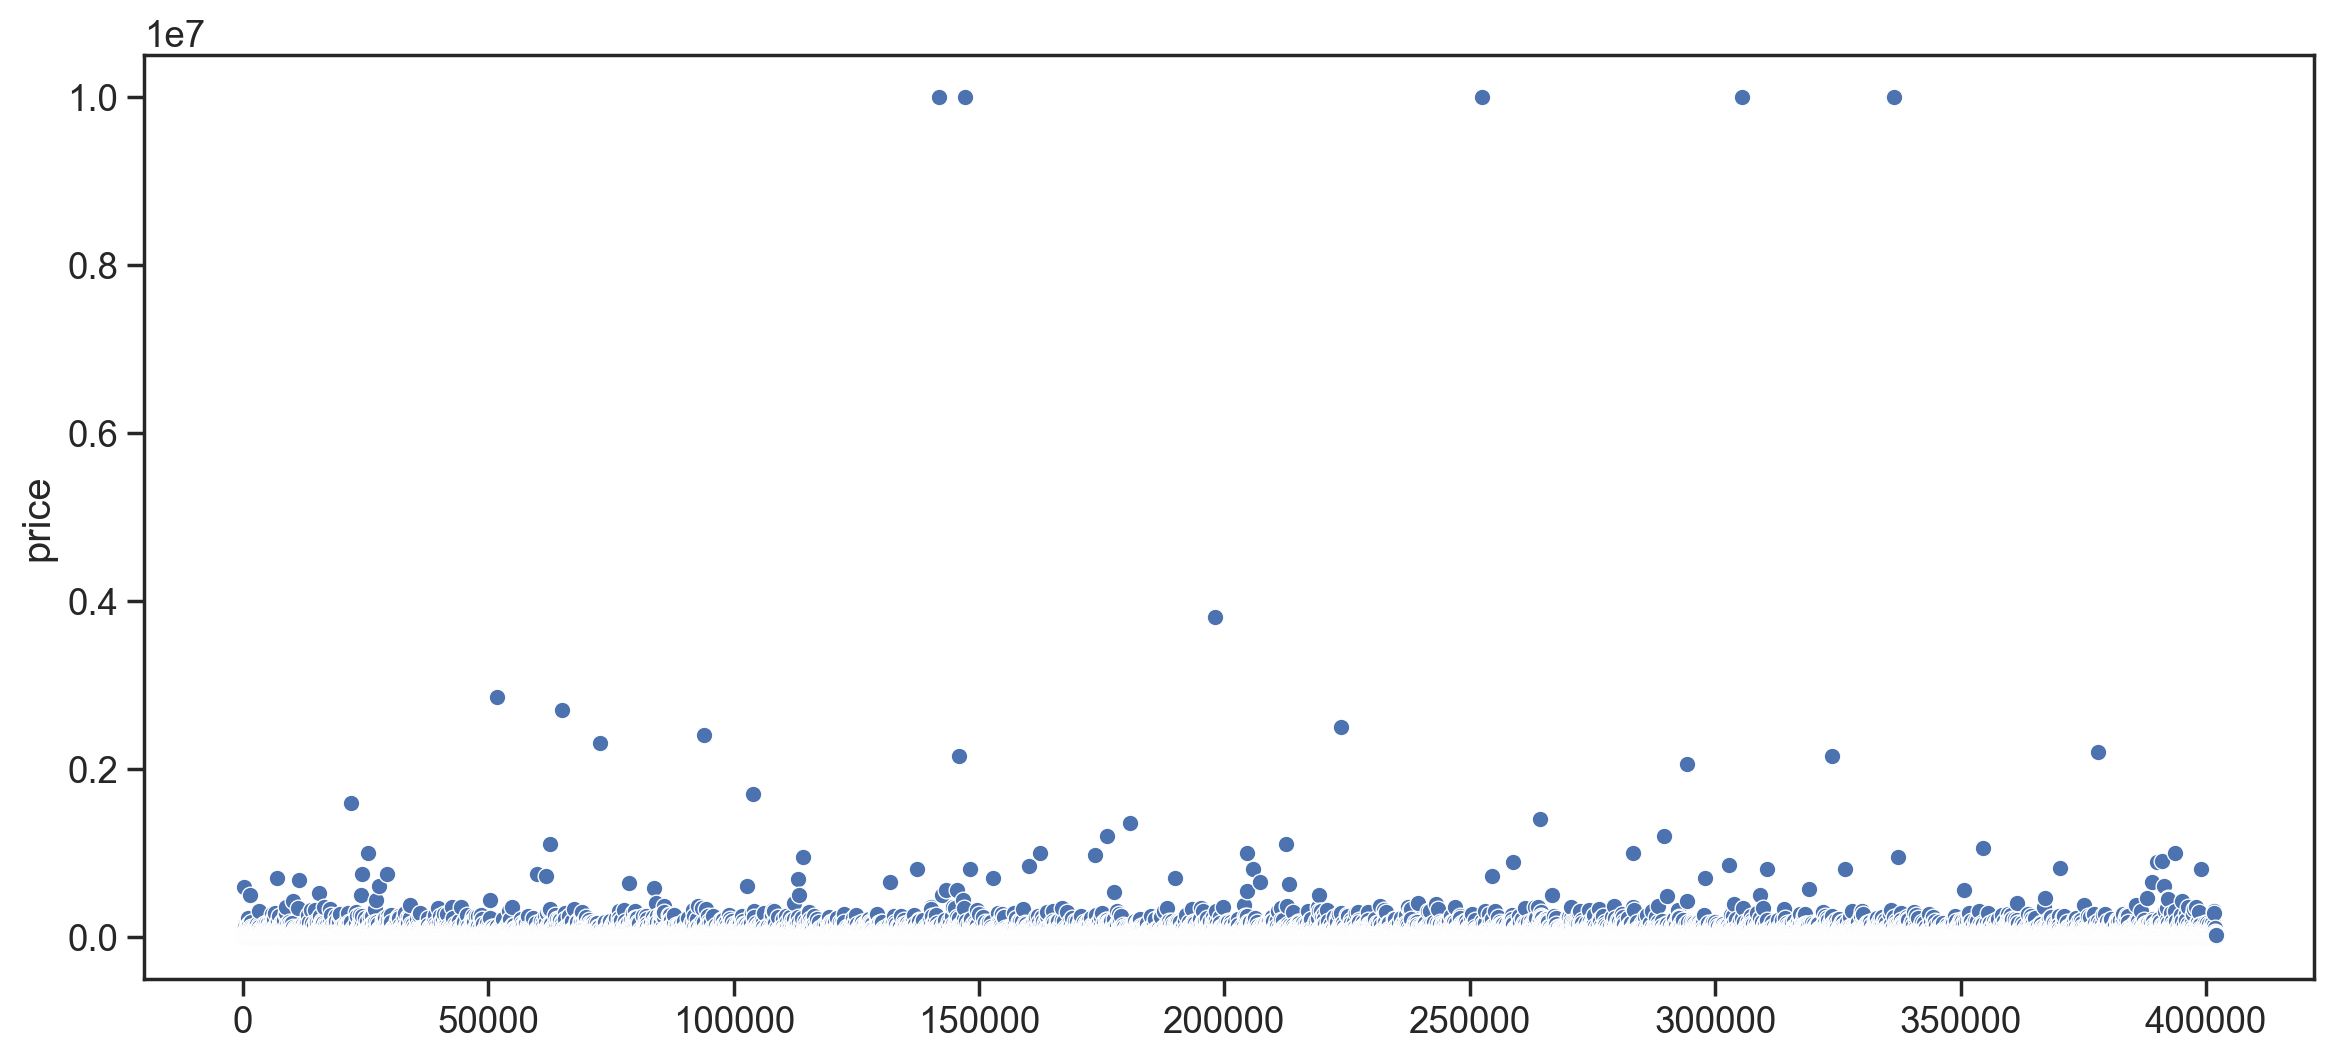

In [432]:
sns.scatterplot(data=sample_advert['price'])

### 2.3 Feature engineering

In this part, we will be working on converting the categorical data to numeric, to check the correlation between all the features (predictors).
1. Firstly we will scale the data, where it gives structure to data and standardize the range of features of an input data set.

In [433]:
from sklearn.preprocessing import StandardScaler

In [434]:
Scaler=StandardScaler()

In [436]:
Scaler.fit_transform(sample_advert[['mileage','year_of_registration']])

array([[-1.08346843, -0.25340458],
       [ 2.31985881, -1.6303757 ],
       [-0.83819491,  0.43508098],
       ...,
       [ 0.57558678, -1.28613292],
       [-0.76115388, -0.25340458],
       [-0.64323392, -0.59764736]])

In [463]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
oe=OrdinalEncoder()

<I>We are using Ordinal Encoding for vehicle_condition, body_type and fuel_type</I>

In [464]:
sample_advert.vehicle_condition=oe.fit_transform(sample_advert[["vehicle_condition"]]).astype(int)

In [465]:
sample_advert.body_type=oe.fit_transform(sample_advert[["body_type"]]).astype(int)

In [466]:
sample_advert.fuel_type=oe.fit_transform(sample_advert[["fuel_type"]]).astype(int)

After scaling the data and converting categorical values to numerical we have the dataset as below:

In [441]:
sample_advert.head()

mileage  vehicle_condition  year_of_registration  price  body_type  \
0       0.0                  0                  2015  73970         13   
1  108230.0                  1                  2011   7000         14   
2    7800.0                  1                  2017  14000         13   
3   45000.0                  1                  2016   7995          7   
4   64000.0                  1                  2015  26995         13   

   fuel_type  
0          7  
1          1  
2          5  
3          1  
4          1

In [442]:
sample_advert.corr()['price']

mileage                -0.152224
vehicle_condition      -0.095481
year_of_registration    0.118914
price                   1.000000
body_type               0.043248
fuel_type               0.018249
Name: price, dtype: float64

Now again, checking the correlation between all the features (predictors) and price (target).
Year_of_registration, body_type and fuel type shows positive and correlation, while mileage shows the least.

## Section-3 Analysis 

### 1.1 Quantitative - Quantitative analysis

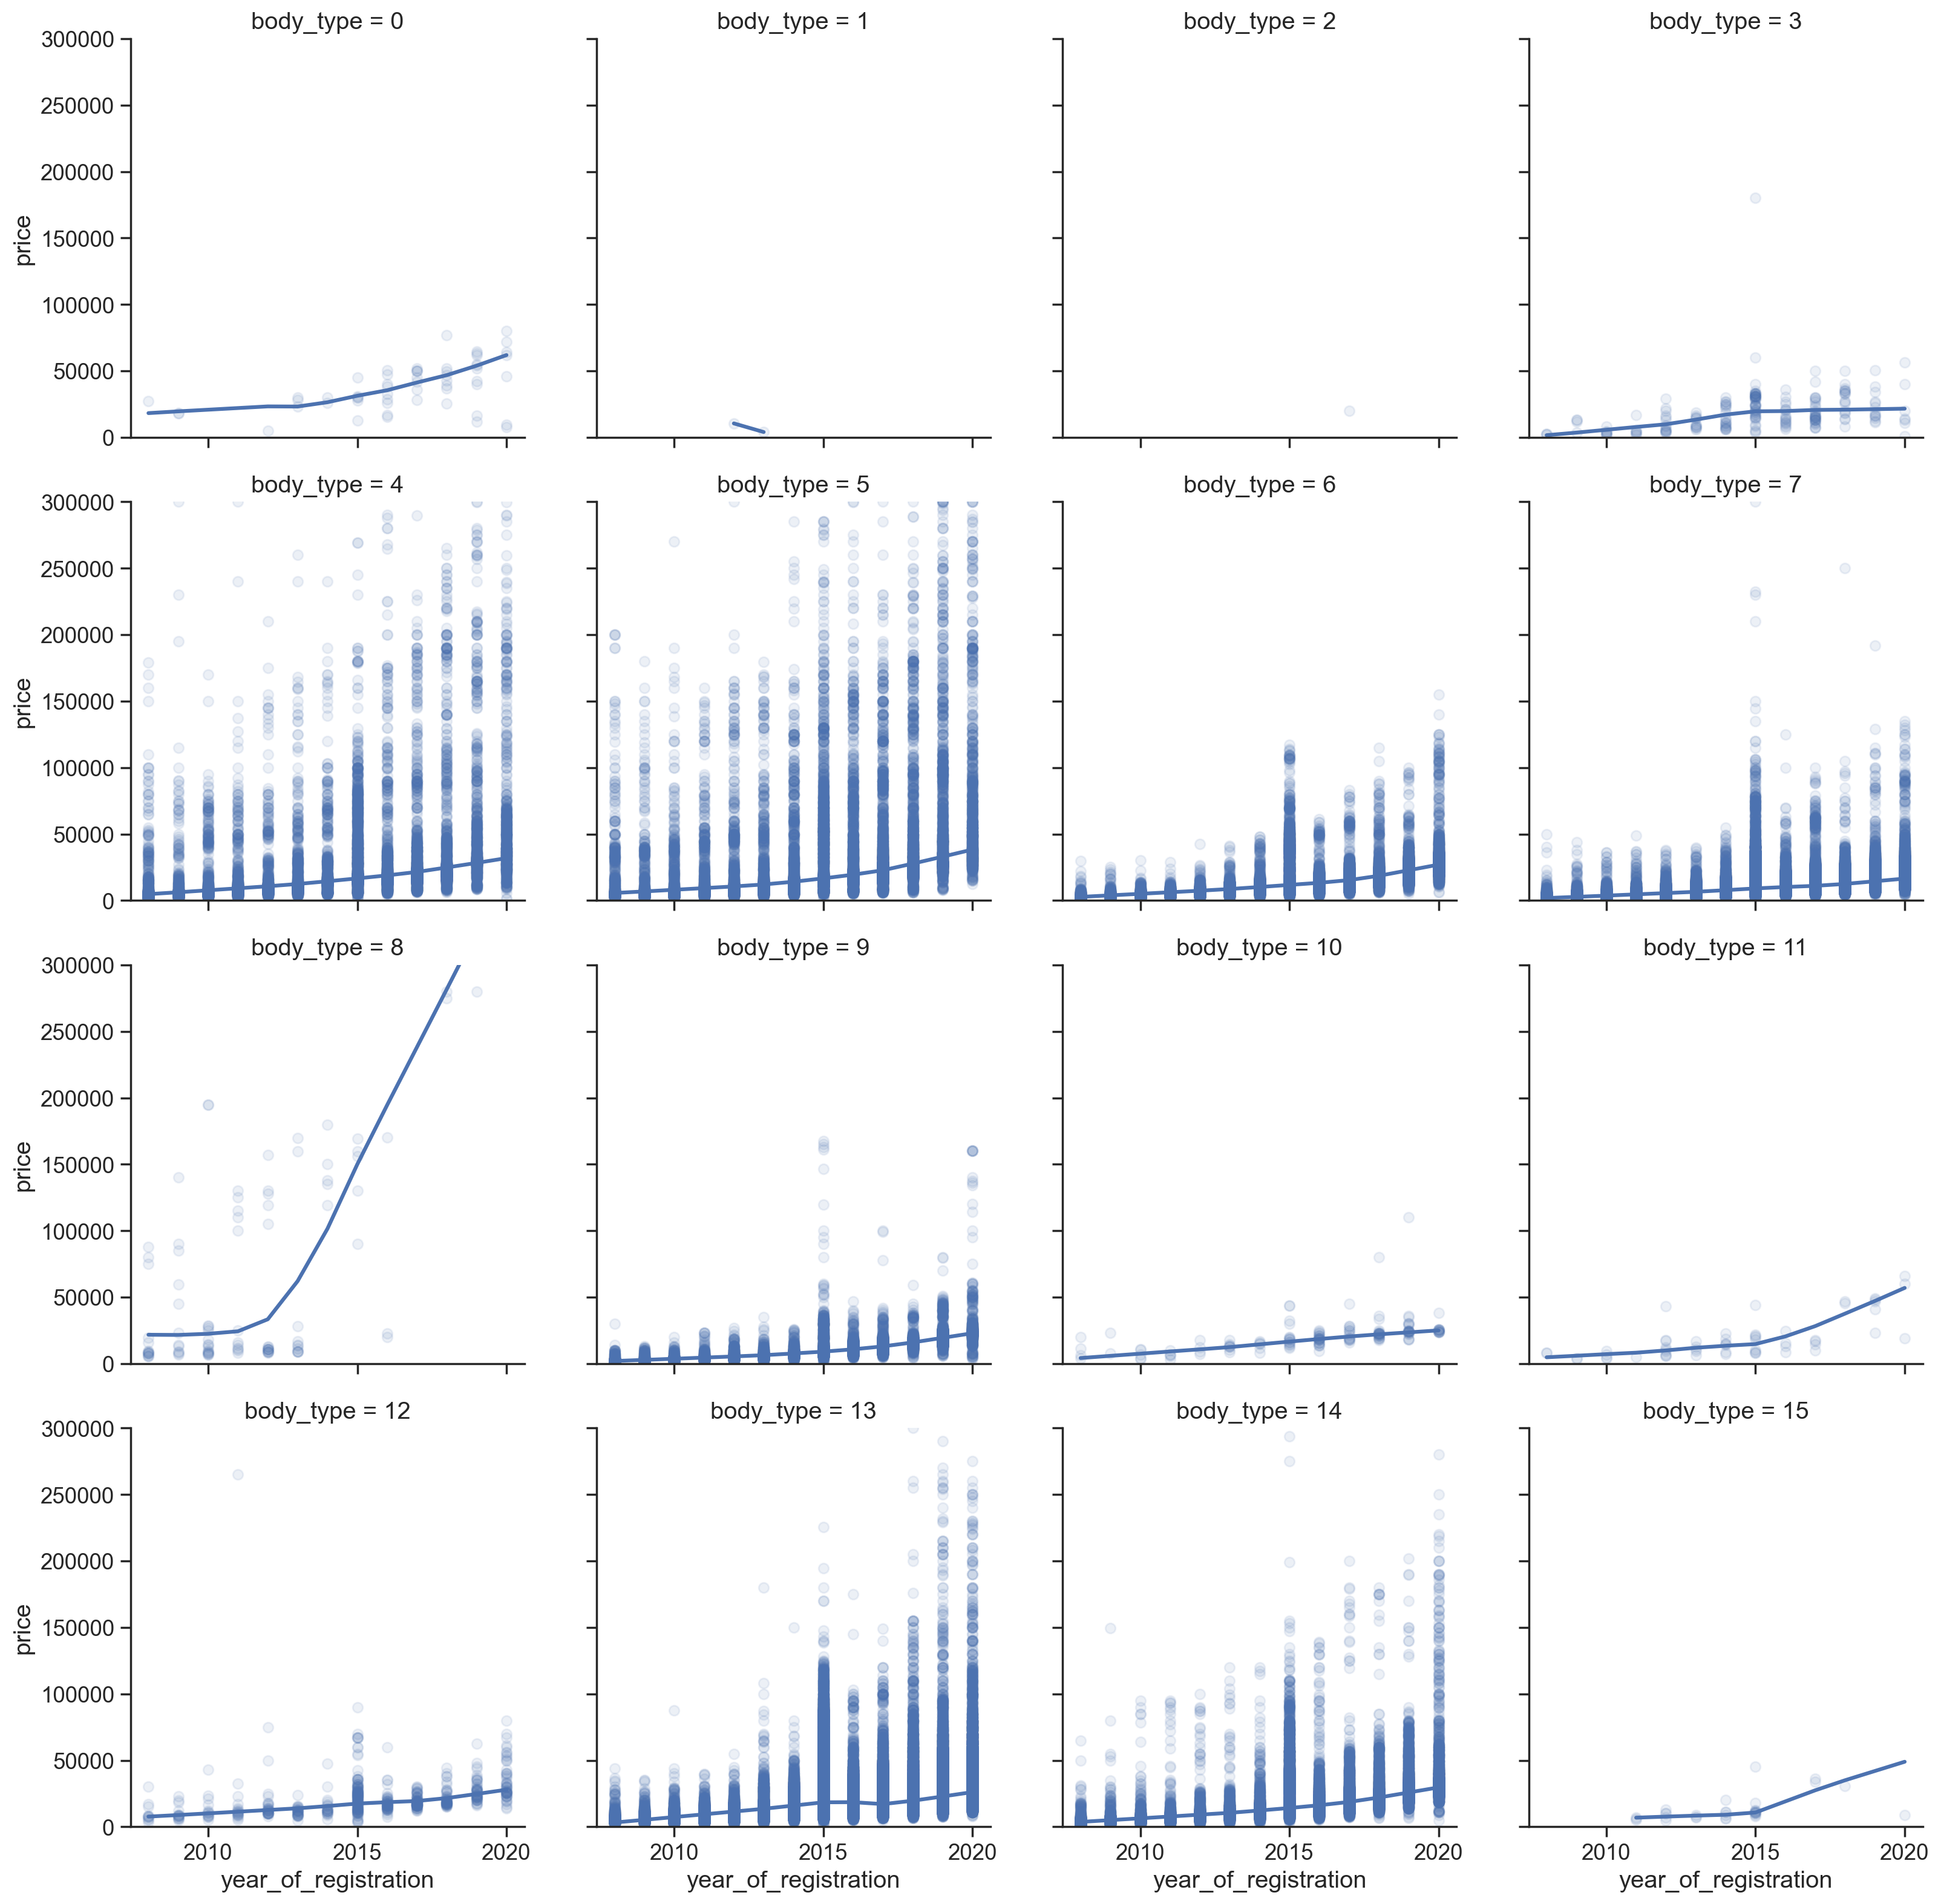

In [469]:
sns.lmplot(
    data=sample_advert, x='year_of_registration', y='price',col='body_type', col_wrap=4,
    scatter_kws=dict(alpha=0.1), height=4, lowess=True).set(ylim=(0,300000))

Observations:
1. Respective to body_type the price of a car increases/ decreases along with the year_of_registration.
2. Body type 8 has a huge spike in the price in the year between 2018-19.
3. On the other hand, body type 3 has a fall in the price has the year increased.


<AxesSubplot:xlabel='year_of_registration', ylabel='price'>

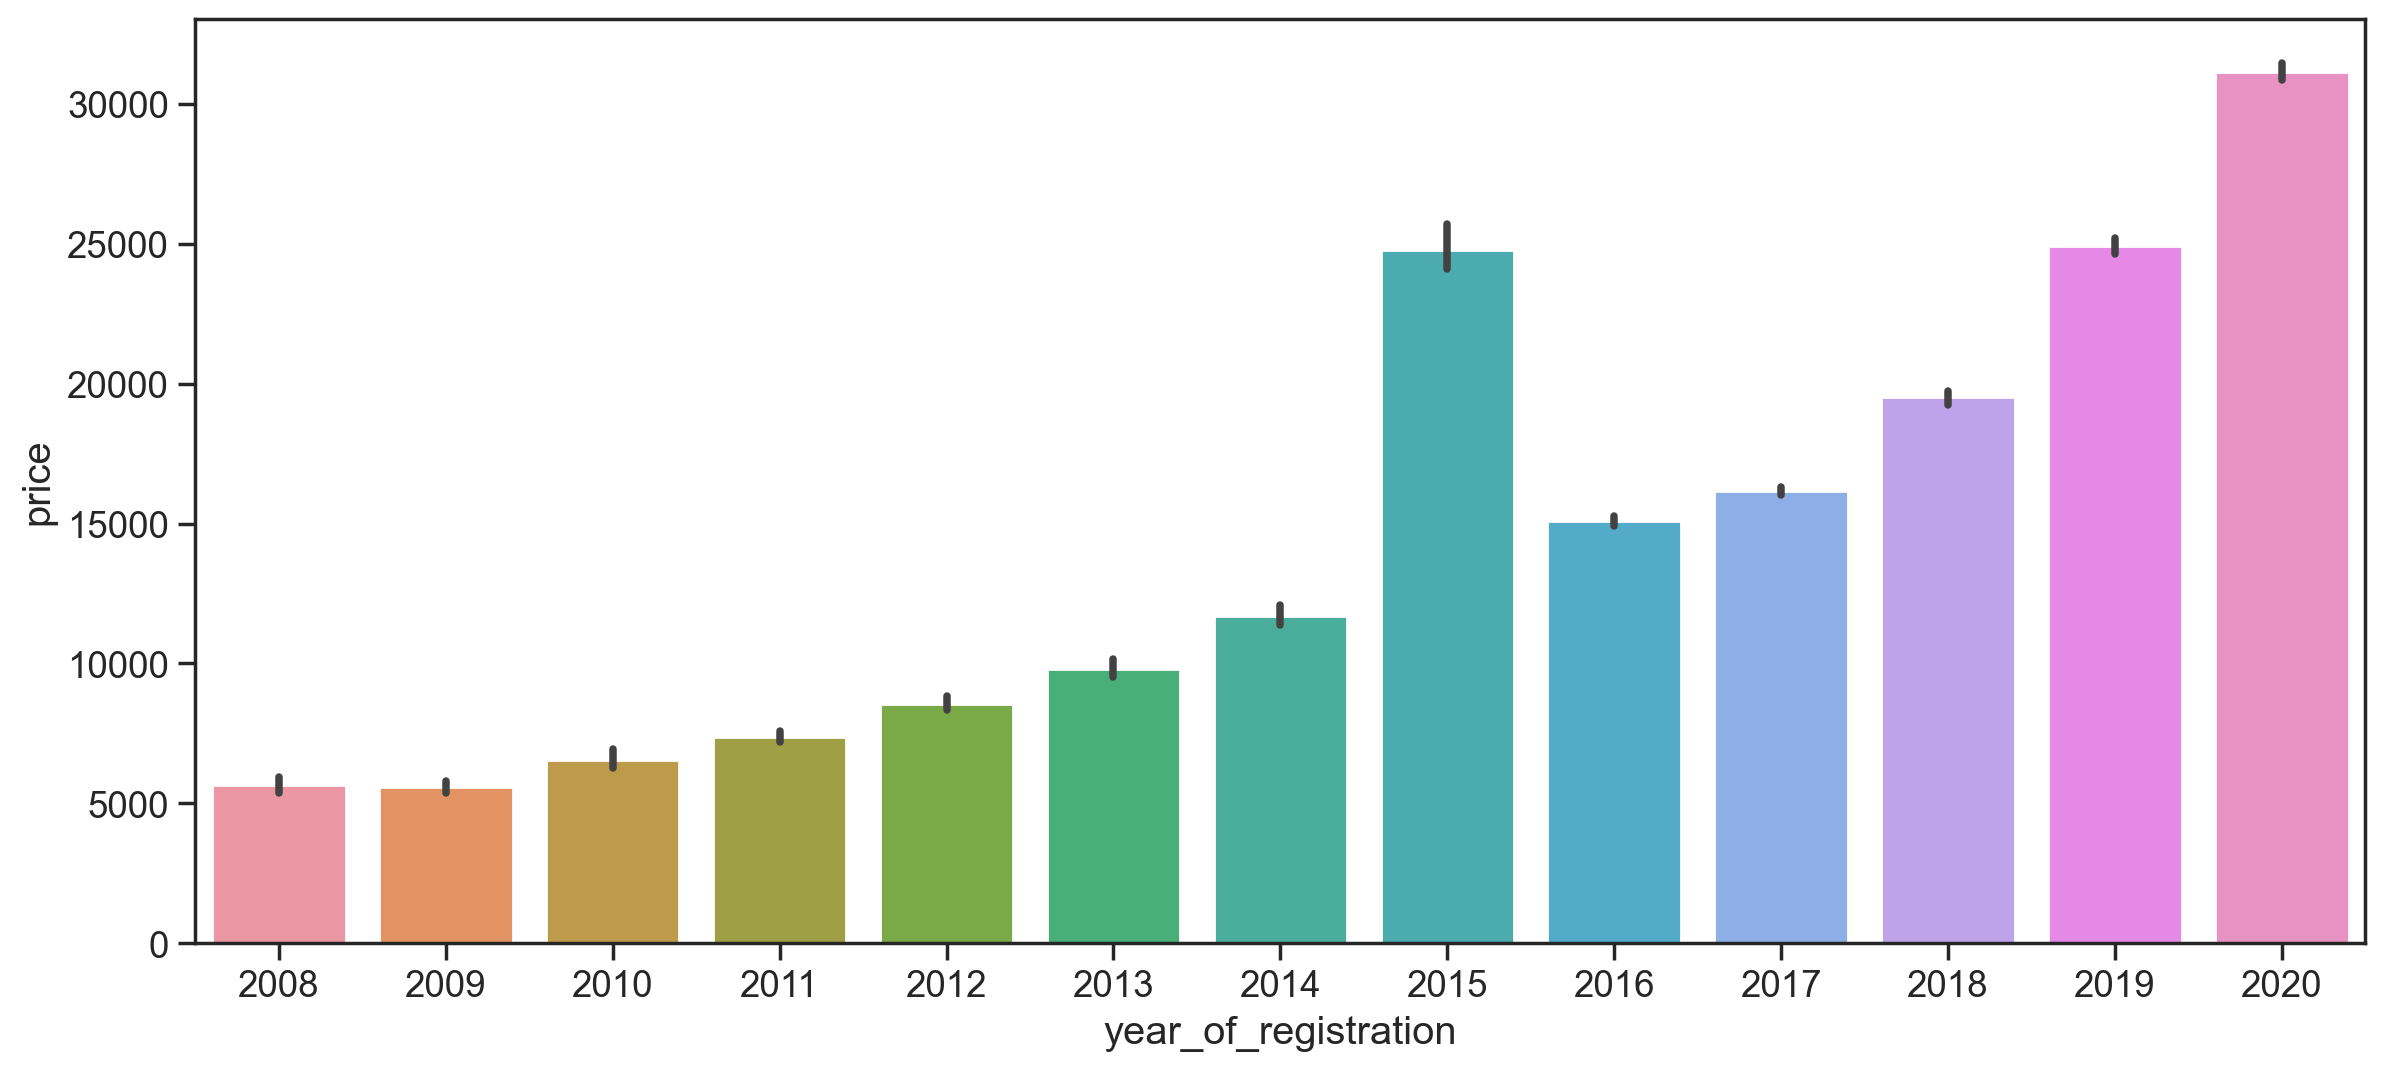

In [447]:
sns.barplot(data=sample_advert, x='year_of_registration',y='price')

Observations:
1. Price increases as year of registration increases.
2. Spike in price in year 2015.

### 3.2 Quantitative-Categorical analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'Saloon'),
  Text(2, 0, 'Hatchback'),
  Text(3, 0, 'Convertible'),
  Text(4, 0, 'Limousine'),
  Text(5, 0, 'Estate'),
  Text(6, 0, 'MPV'),
  Text(7, 0, 'Coupe'),
  Text(8, 0, 'Pickup'),
  Text(9, 0, 'Combi Van'),
  Text(10, 0, 'Panel Van'),
  Text(11, 0, 'Minibus'),
  Text(12, 0, 'Window Van'),
  Text(13, 0, 'Camper'),
  Text(14, 0, 'Car Derived Van'),
  Text(15, 0, 'Chassis Cab')])

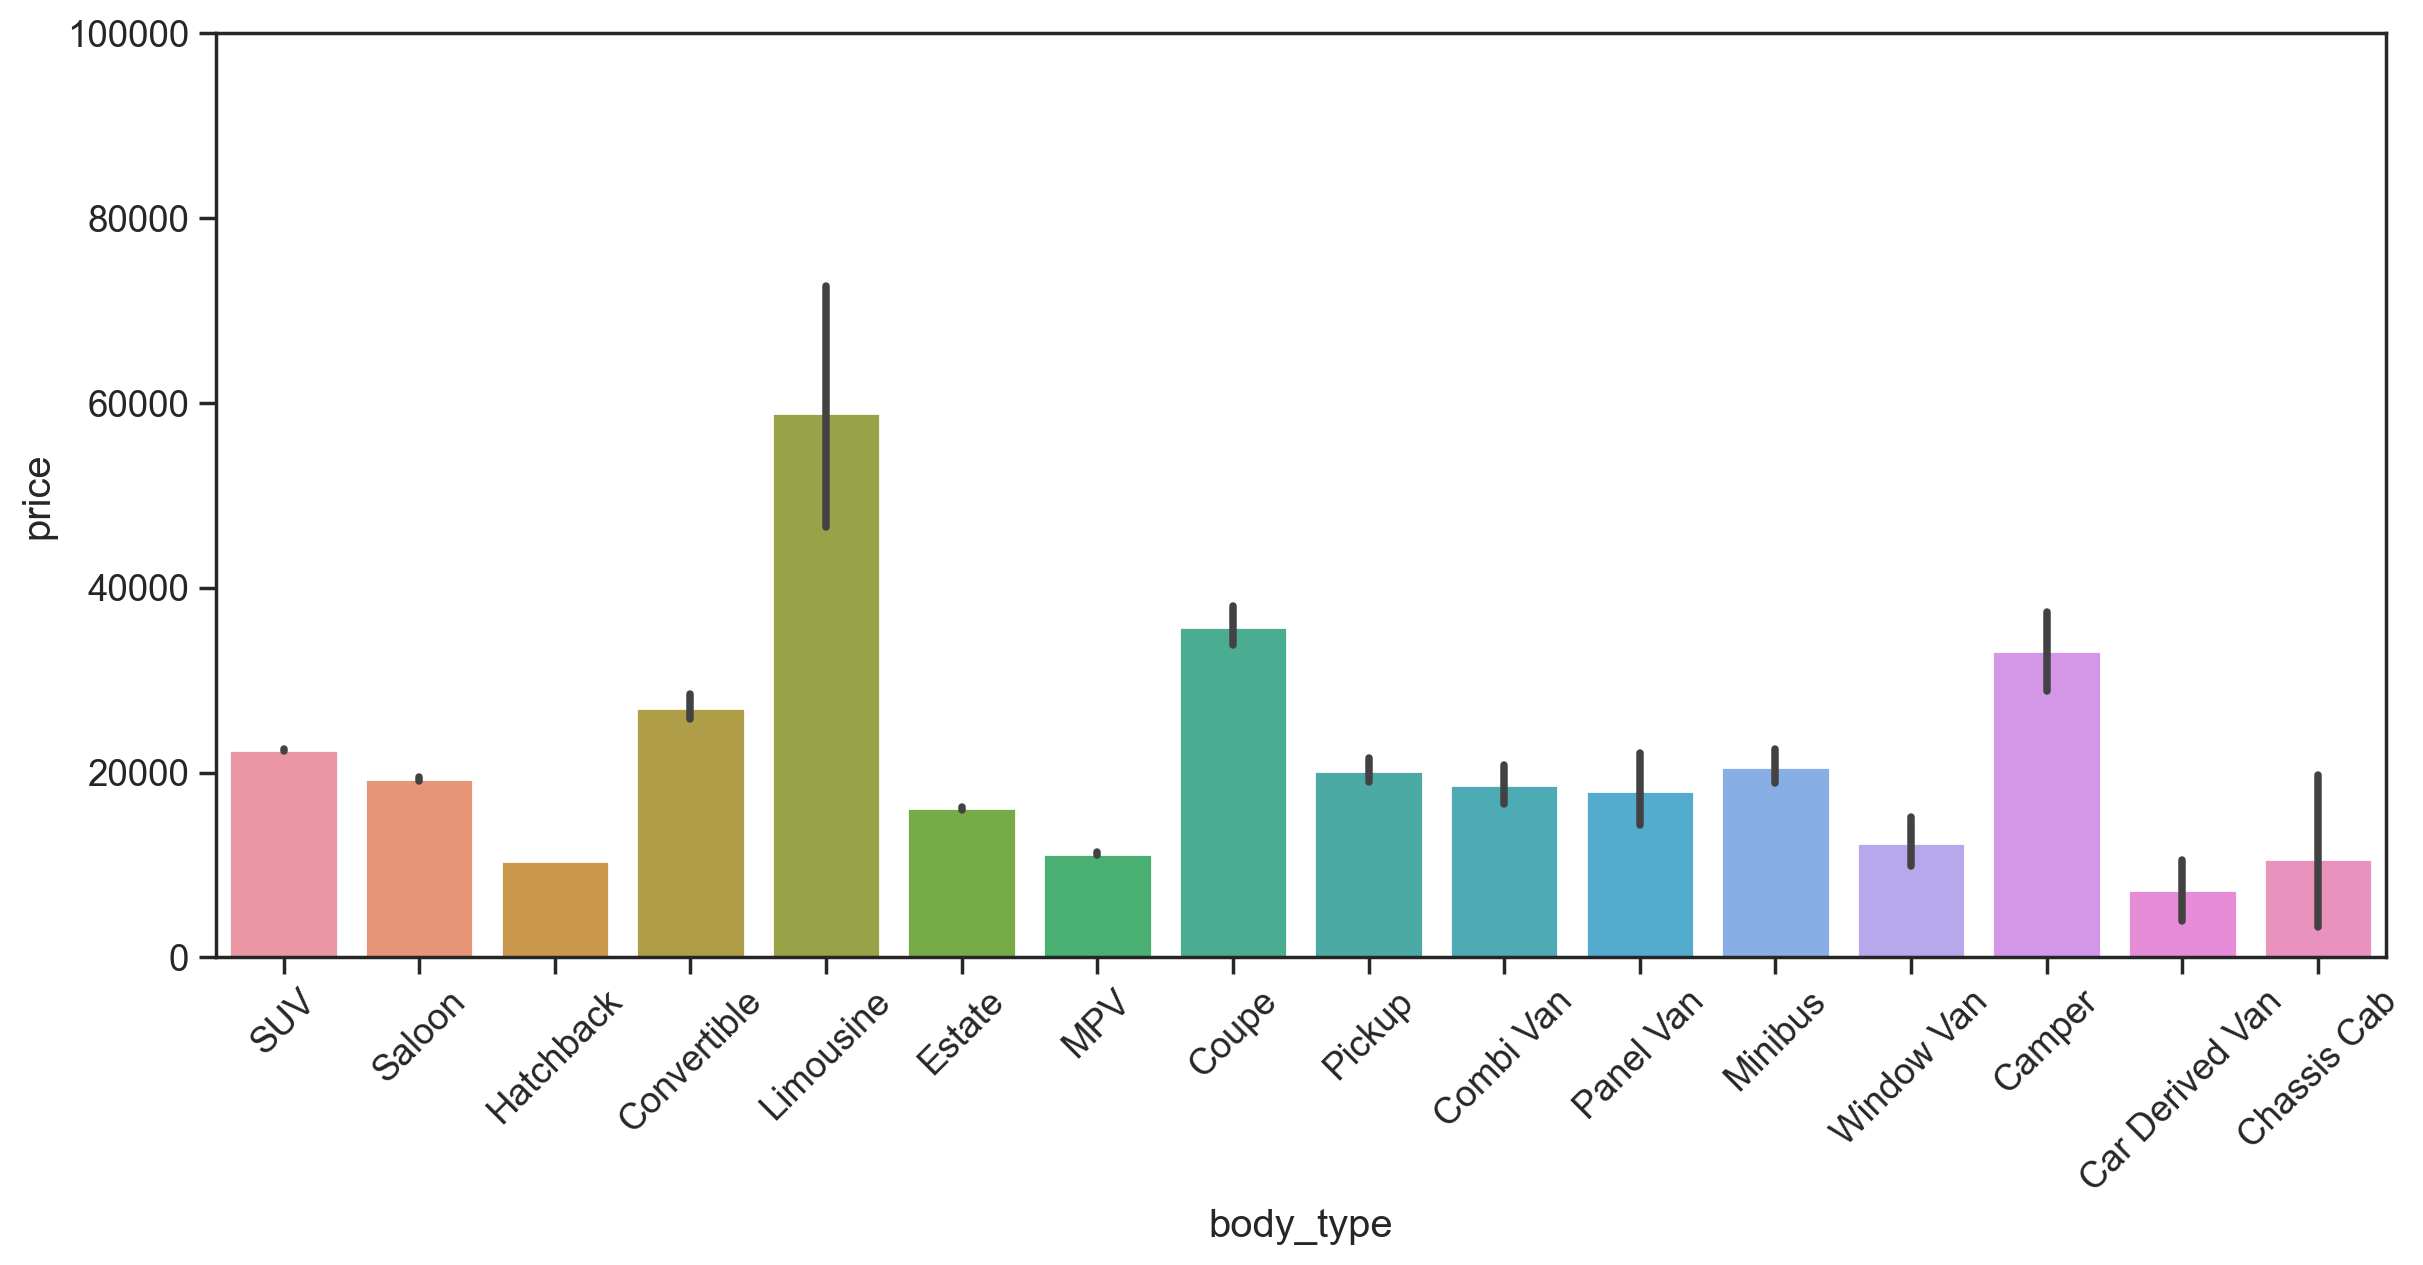

In [352]:
price_bodytype=sns.barplot(data=advert, x='body_type',y='price').set(ylim=(0,100000))
price_bodytype
plt.xticks(rotation=45)


Observations:
1. Limousine is the most expensive body type, camper takes the second spot.
2. Car Derived Van is the cheapest car.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Petrol Plug-in Hybrid'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Petrol'),
  Text(3, 0, 'Diesel Hybrid'),
  Text(4, 0, 'Petrol Hybrid'),
  Text(5, 0, 'Electric'),
  Text(6, 0, 'Diesel Plug-in Hybrid'),
  Text(7, 0, 'Bi Fuel'),
  Text(8, 0, 'Natural Gas')])

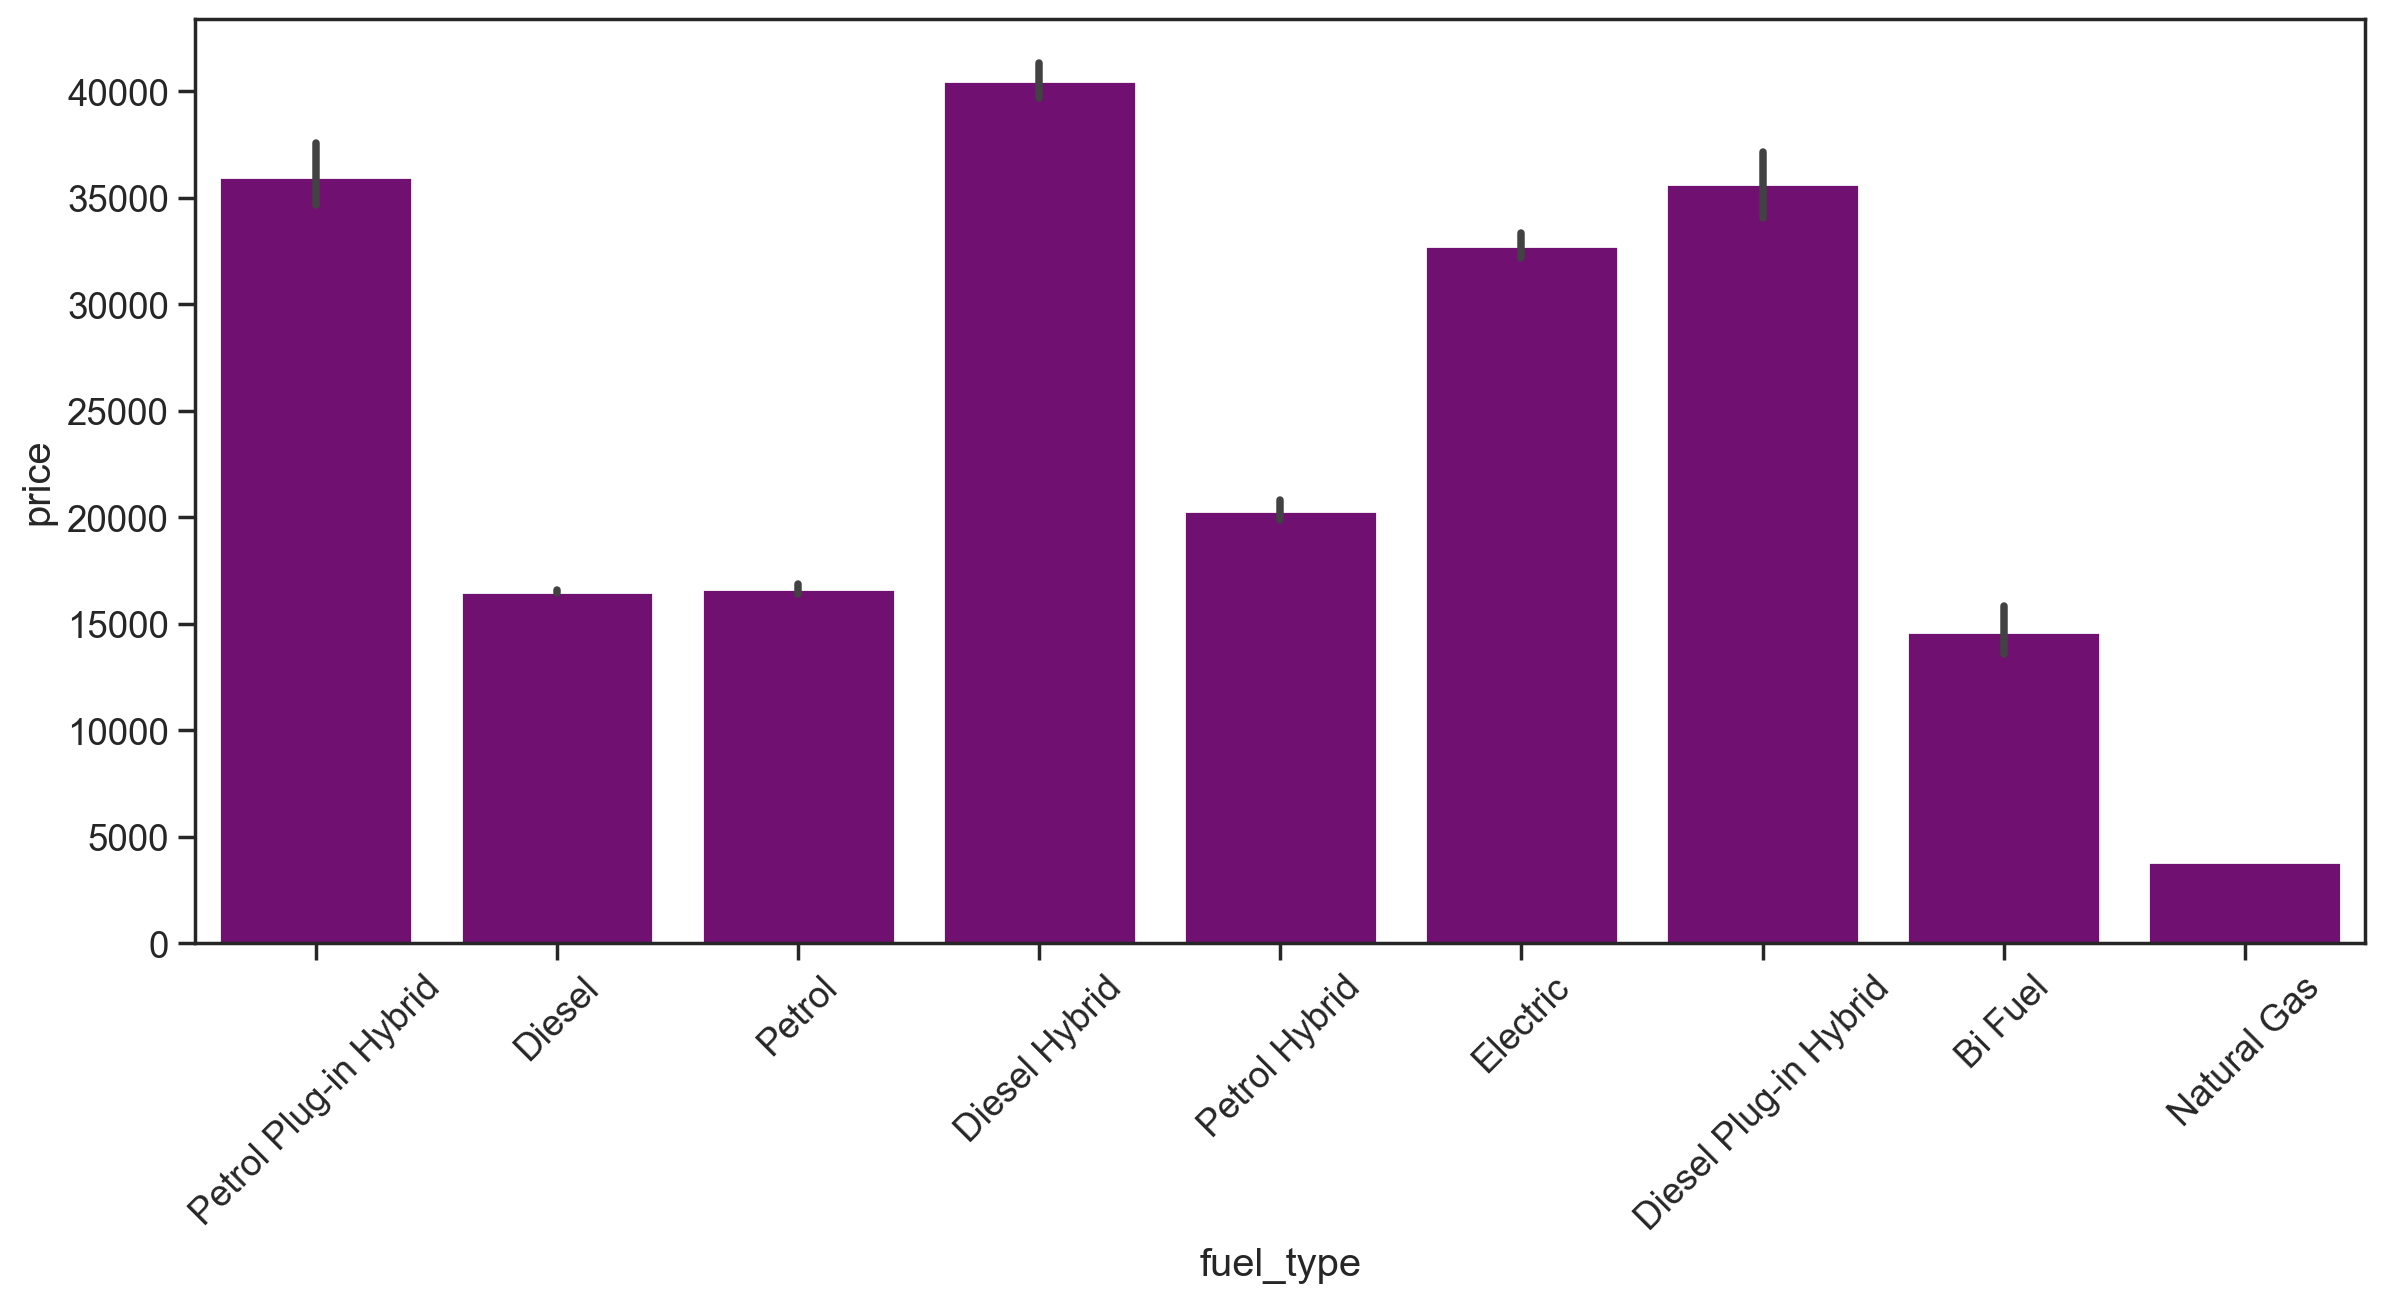

In [353]:
price_fueltype=sns.barplot(data=advert, x='fuel_type',y='price',color='purple')
price_fueltype
plt.xticks(rotation=45)


Observations:
1. Diesel Hybrid is the most expensive, petrol plug-in hybrid and diesel plug-in hybrid are the second most expensive.
2. Natural Gas is the cheapest fuel_type.

<AxesSubplot:xlabel='vehicle_condition', ylabel='price'>

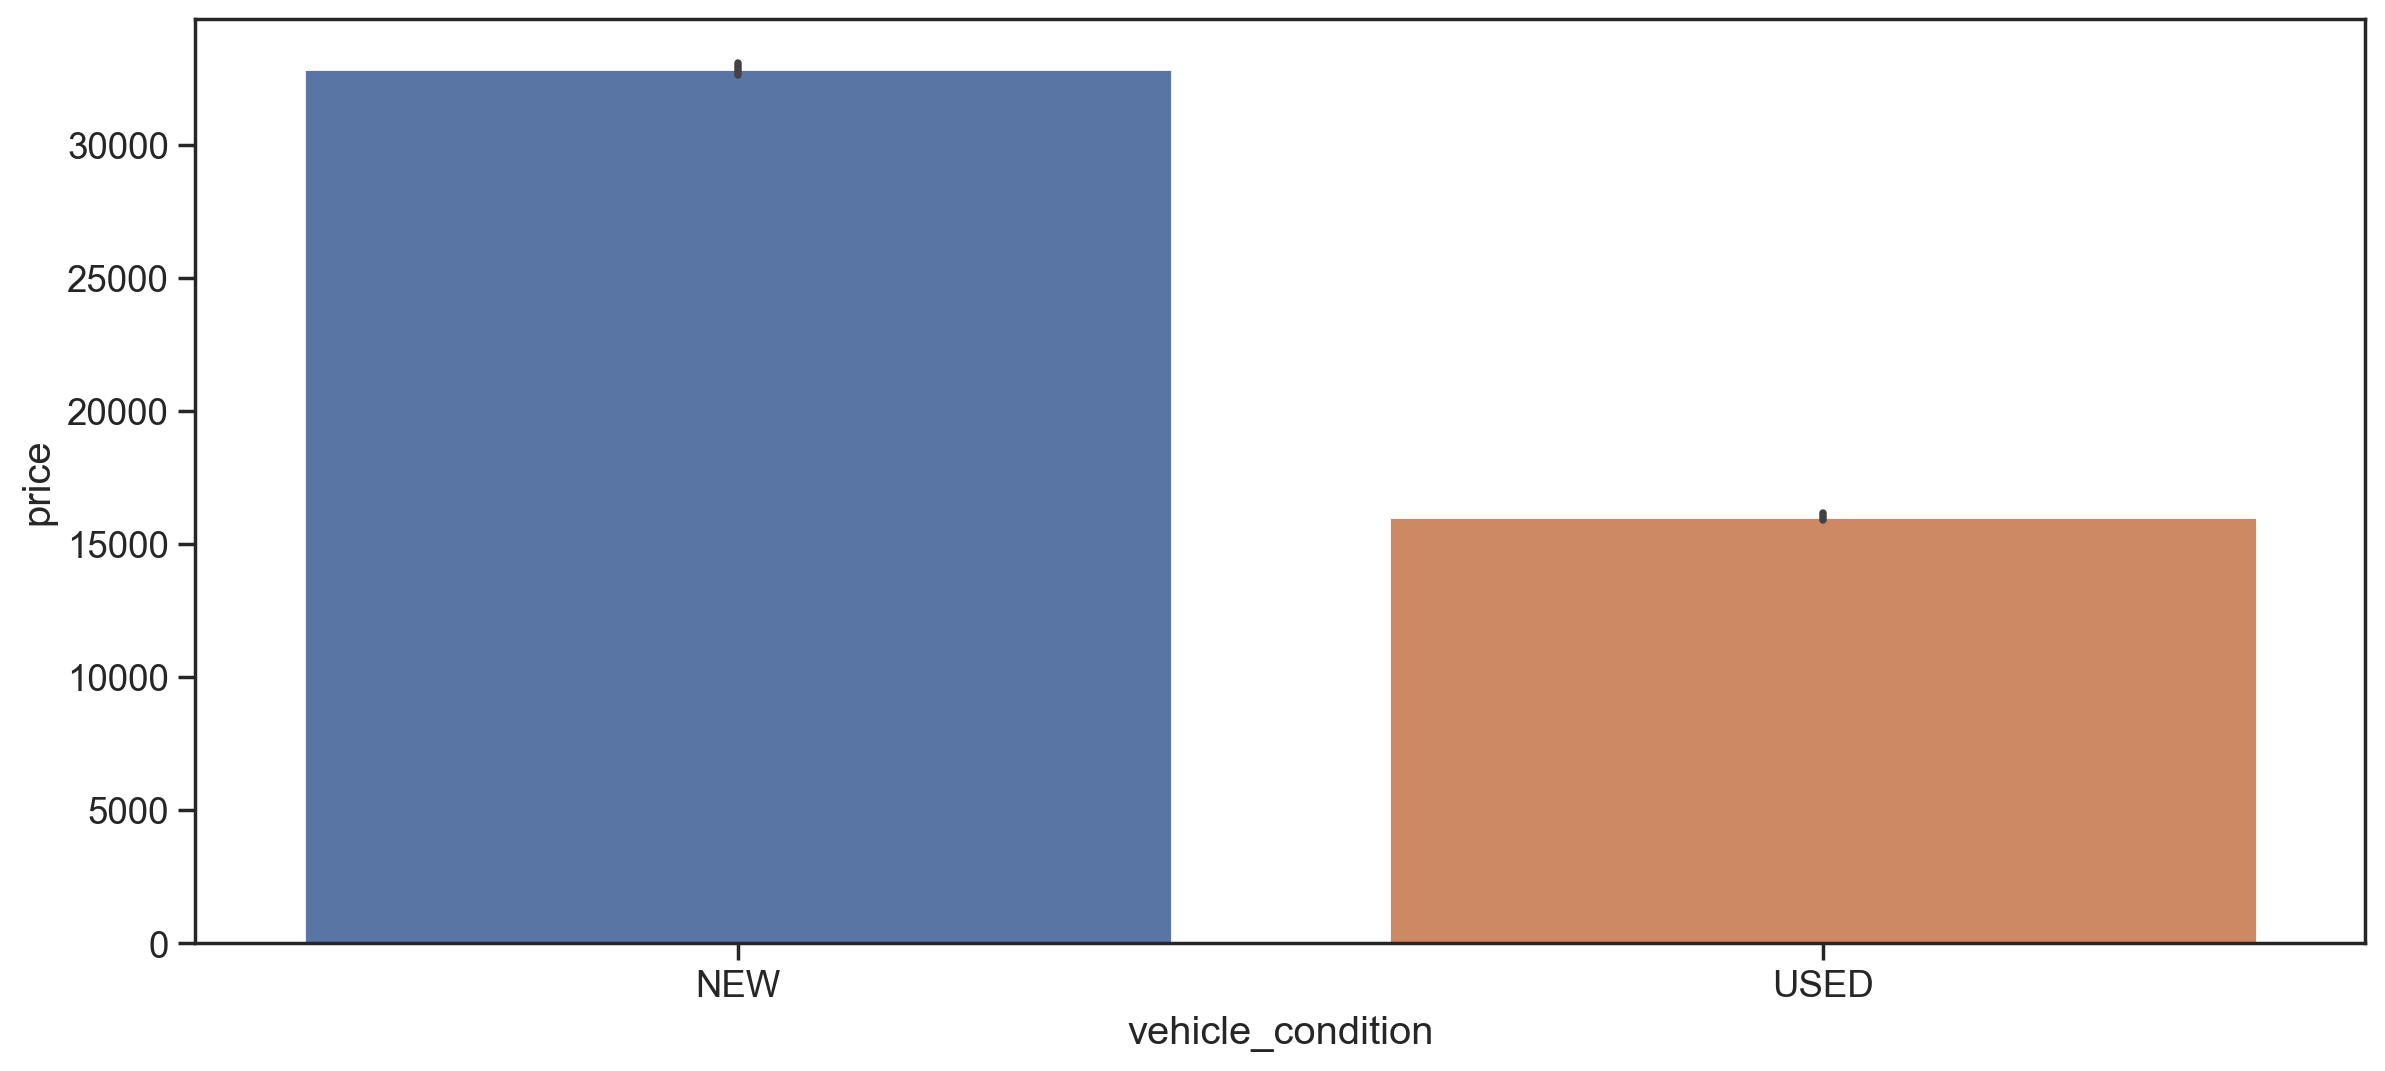

In [354]:
sns.barplot(x = 'vehicle_condition', y = 'price', data = advert)


Observations:
1. New cars are more expensive than used cars.

<AxesSubplot:>

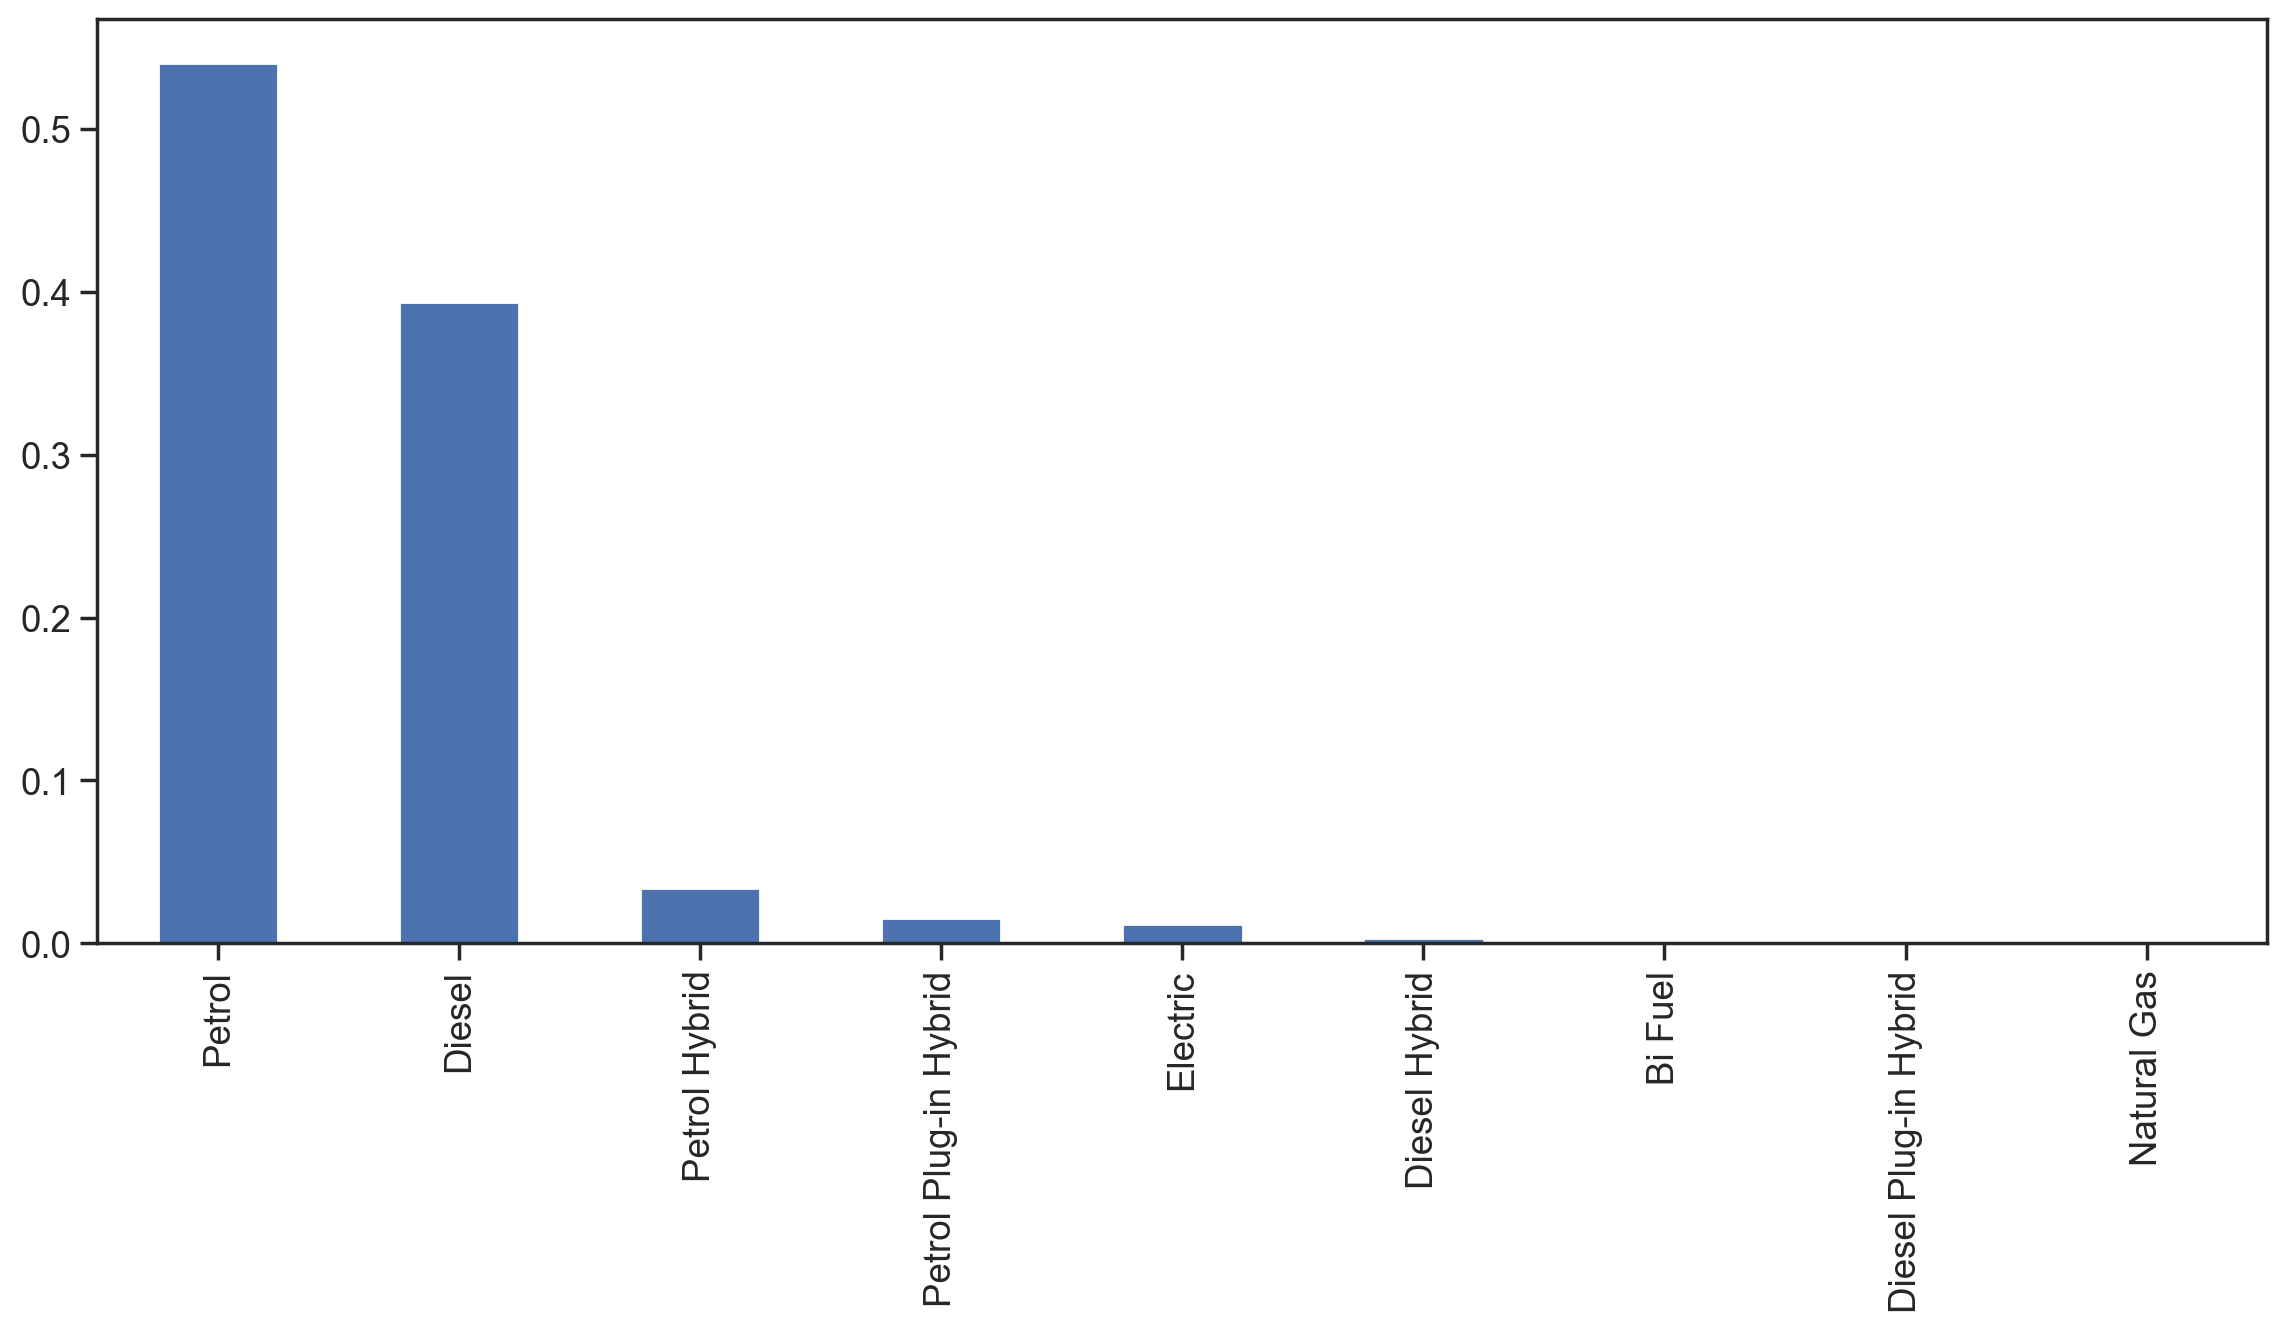

In [309]:
advert['fuel_type'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

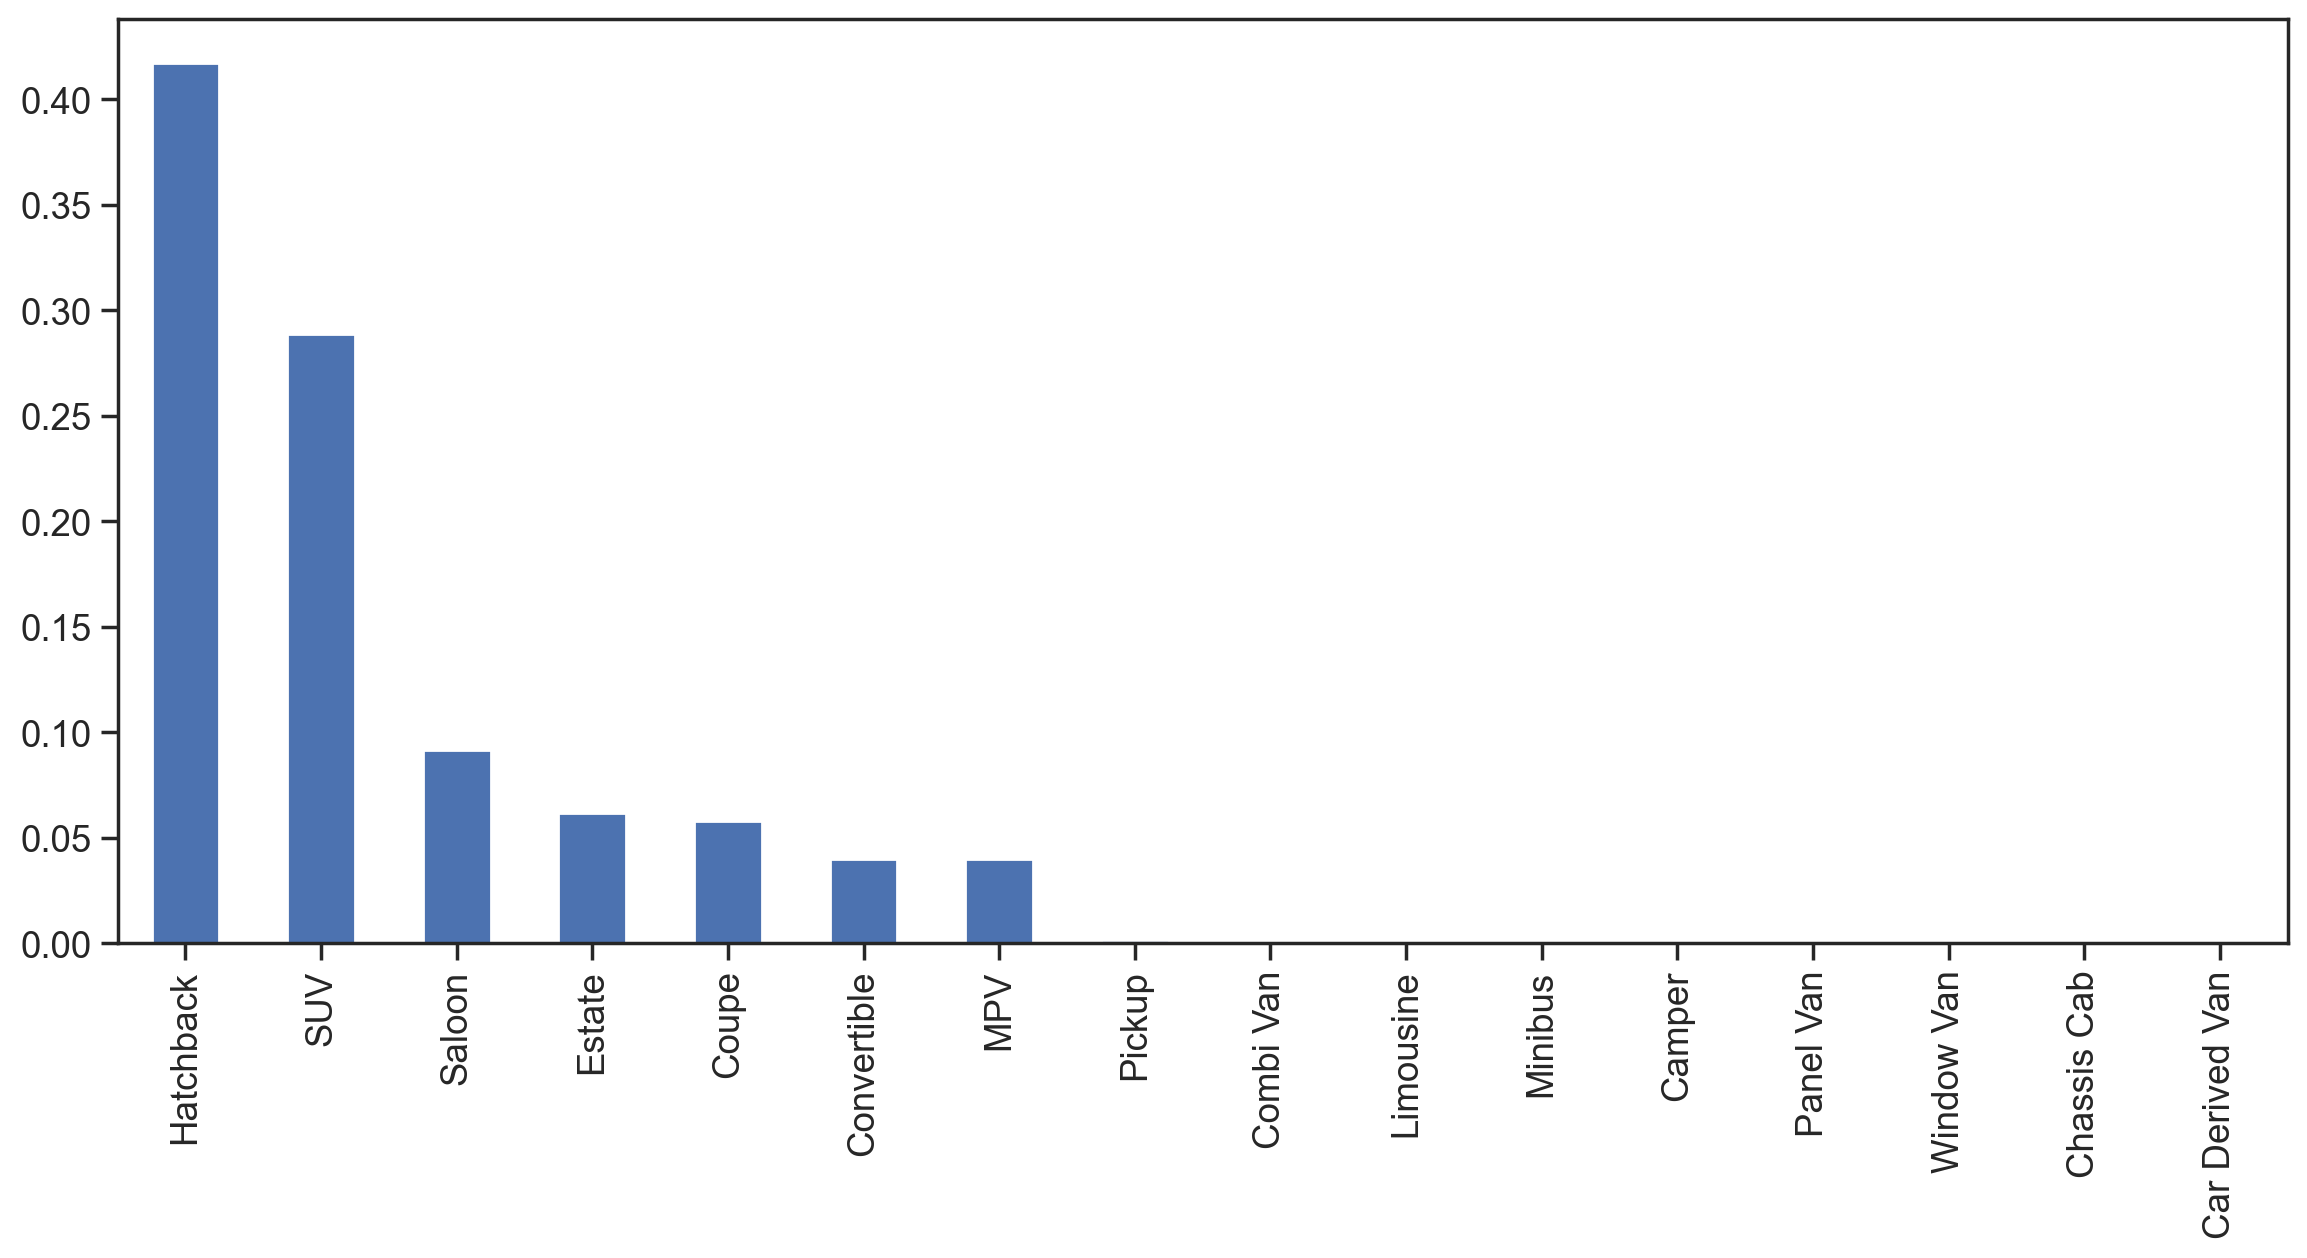

In [310]:
advert['body_type'].value_counts(normalize=True).plot.bar()

### 3.3 Categorical-Categorical analysis

In [474]:
rnd = advert.groupby(['body_type', 'fuel_type'])['price'].median().unstack()
rnd.head(10)

fuel_type        Bi Fuel   Diesel  Diesel Hybrid  Diesel Plug-in Hybrid  \
body_type                                                                 
Camper            9497.5  39497.5            NaN                    NaN   
Car Derived Van      NaN   7245.0            NaN                    NaN   
Chassis Cab          NaN   8750.0            NaN                    NaN   
Combi Van            NaN  14995.0            NaN                    NaN   
Convertible      57000.0  14295.0            NaN                    NaN   
Coupe            41995.0  14995.0        47565.0                    NaN   
Estate            3790.0  11950.0        31221.0                19500.0   
Hatchback        11519.5   9495.0         8297.0                    NaN   
Limousine            NaN   8497.0            NaN                    NaN   
MPV               5750.0   9995.0        10550.0                    NaN   

fuel_type        Electric  Natural Gas   Petrol  Petrol Hybrid  \
body_type                                                        
Camper                NaN          NaN  13750.0            NaN   
Car Derived Van       NaN          NaN      NaN            NaN   
Chassis Cab           NaN          NaN      NaN            NaN   
Combi Van         30933.5       3795.0  15995.0            NaN   
Convertible       18944.0          NaN  14990.0      1099950.0   
Coupe             14495.0          NaN  22995.0        27295.0   
Estate            25216.5          NaN  15990.0        14799.5   
Hatchback         23990.0          NaN   8495.0        13295.0   
Limousine             NaN          NaN  59995.0            NaN   
MPV               32475.0          NaN   9000.0        19397.5   

fuel_type        Petrol Plug-in Hybrid  
body_type                               
Camper                             NaN  
Car Derived Van                    NaN  
Chassis Cab                        NaN  
Combi Van                          NaN  
Convertible                    69147.0  
Coupe                          48500.0  
Estate                         27997.0  
Hatchback                      21495.0  
Limousine                          NaN  
MPV                            20995.0

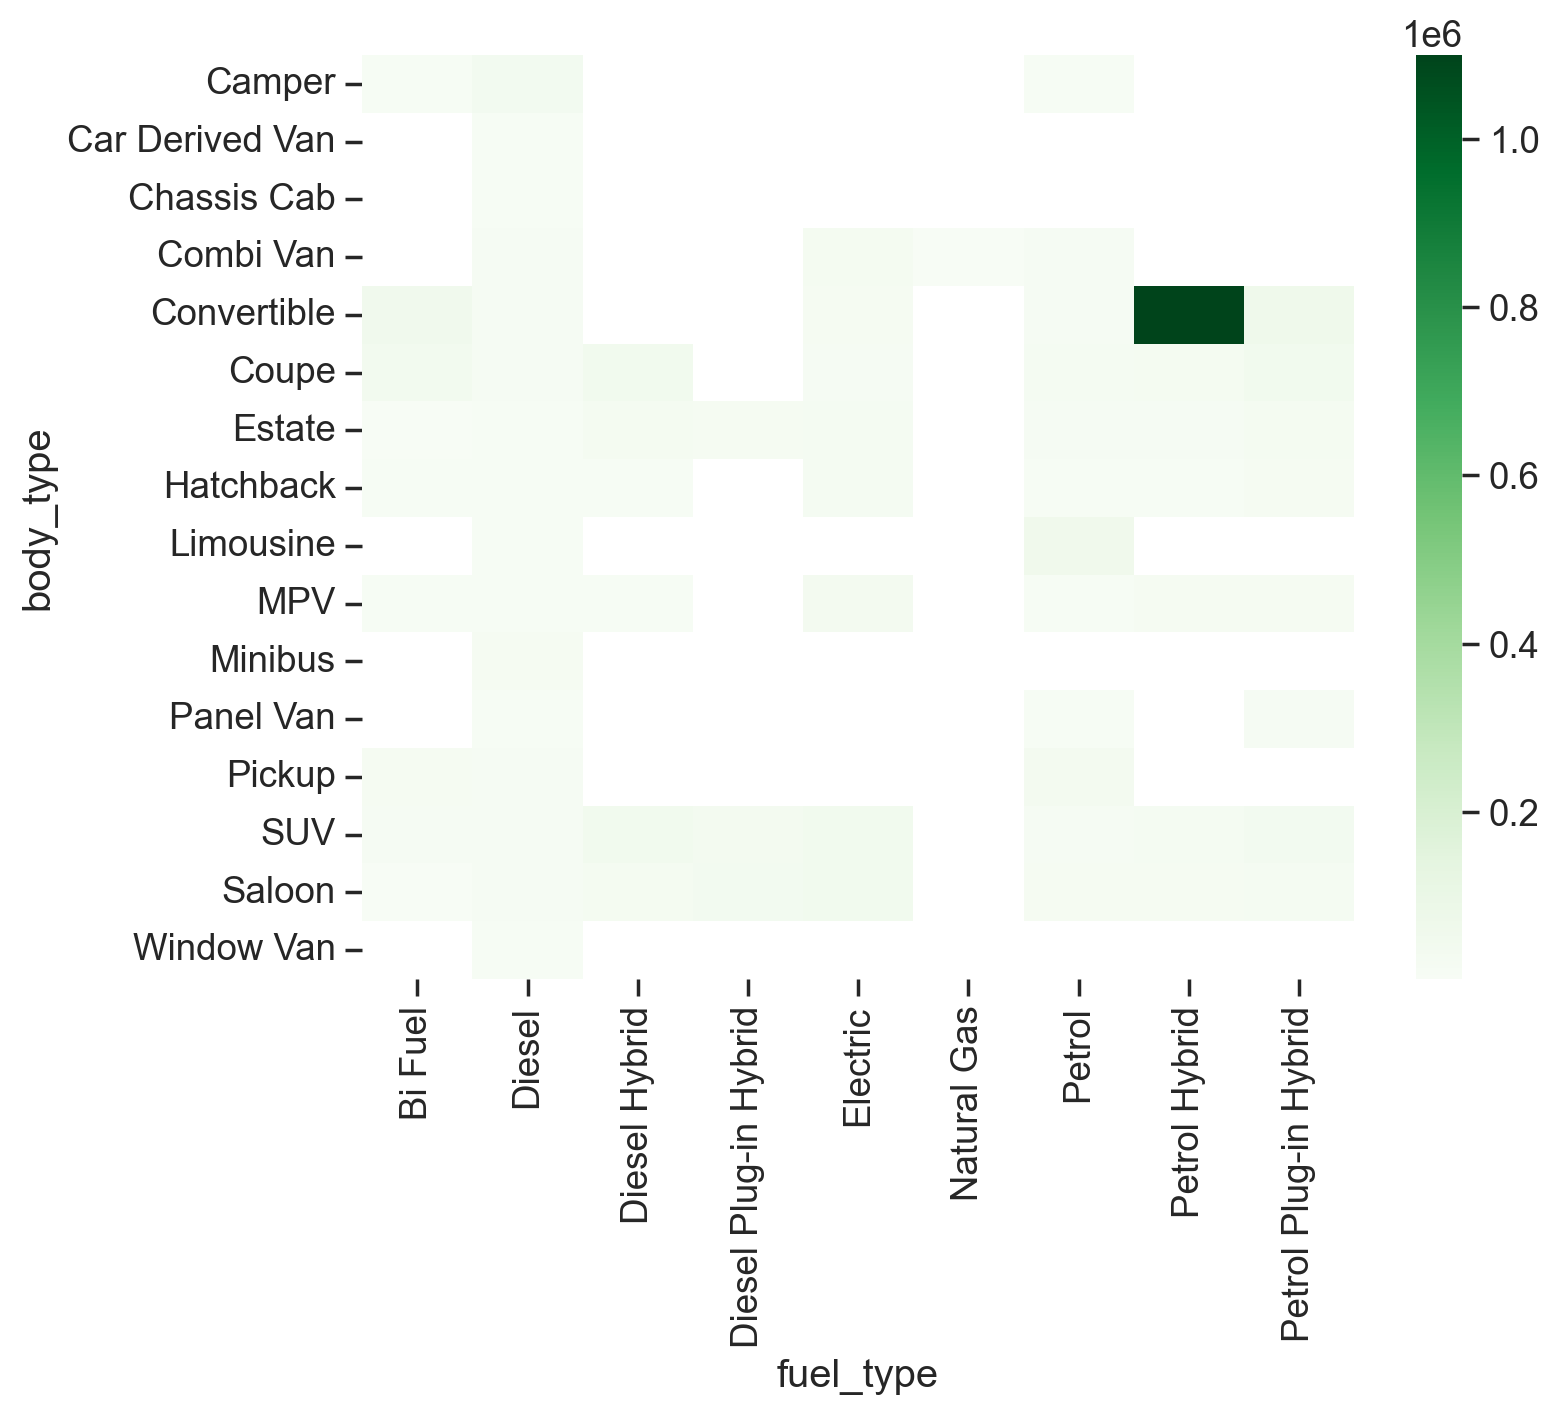

In [475]:
plt.subplots(figsize=(8,6))
sns.heatmap(
    data=rnd, cmap='Greens'
);

Observations:
1. Convertible with Petrol hybrid is most expensive.

In [313]:
avg_price=advert.groupby(['body_type','vehicle_condition'])['price'].mean()

In [314]:
avg_price


body_type        vehicle_condition
Camper           USED                 33197.584416
Car Derived Van  USED                  7245.000000
Chassis Cab      USED                 10598.333333
Combi Van        NEW                  36336.653846
                 USED                 16230.542553
Convertible      NEW                  40105.798365
                 USED                 26387.292081
Coupe            NEW                  55624.437666
                 USED                 35041.950898
Estate           NEW                  37462.720141
                 USED                 14866.036989
Hatchback        NEW                  20993.277737
                 USED                  9709.684775
Limousine        USED                 58953.911950
MPV              NEW                  29510.039039
                 USED                 10828.357803
Minibus          NEW                  39935.000000
                 USED                 20179.931507
Panel Van        USED                 18028.868

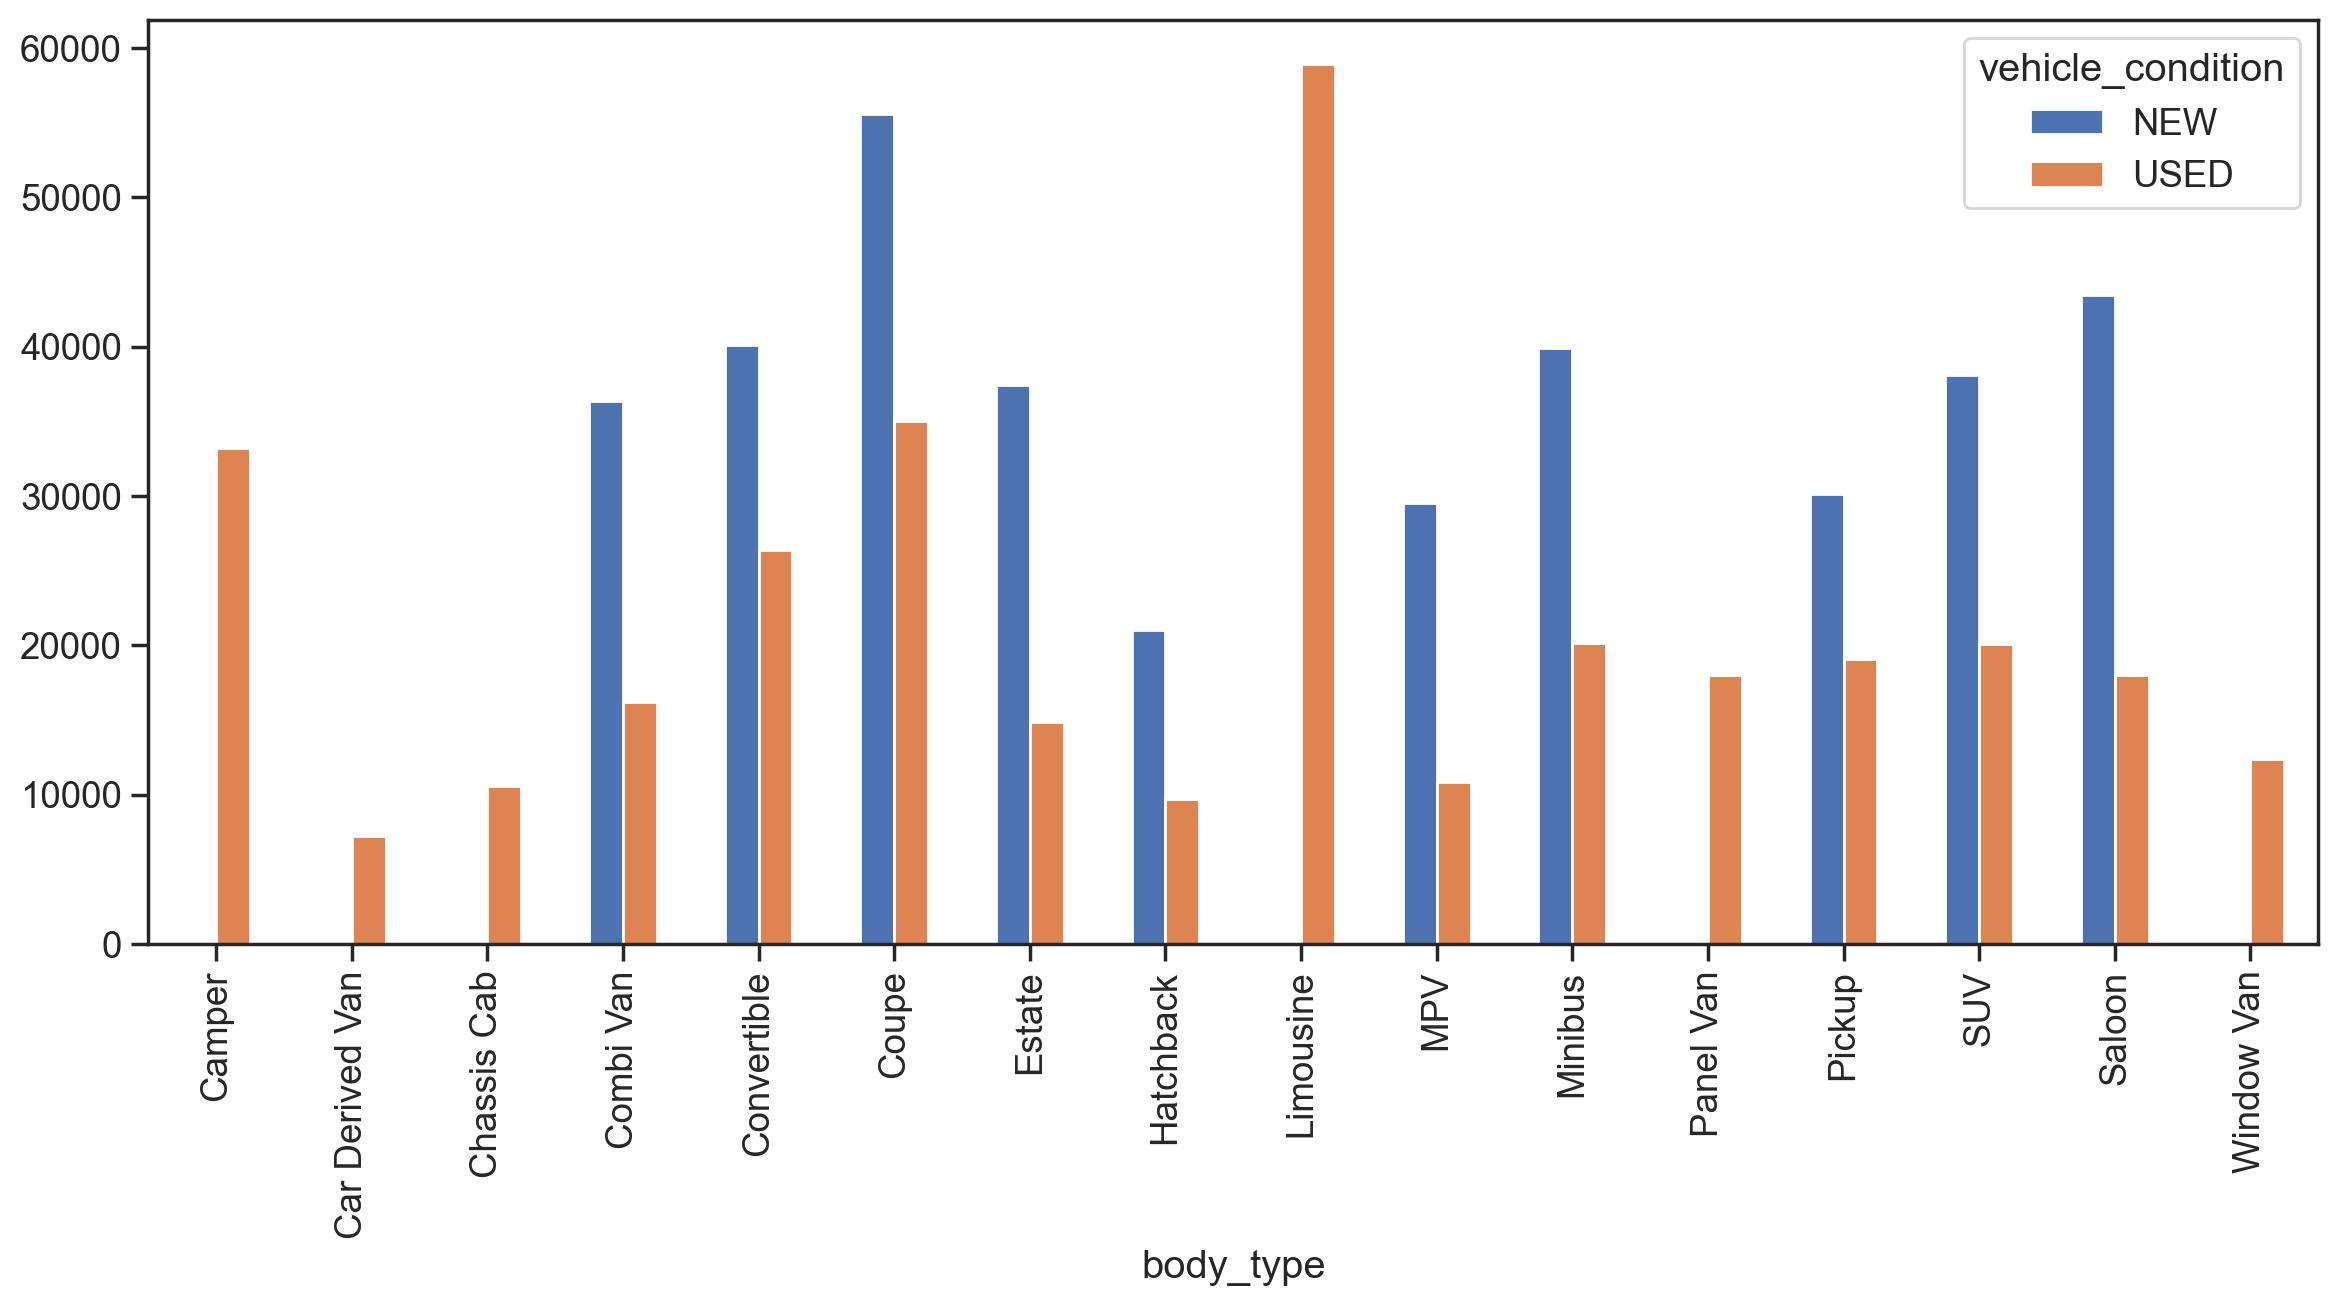

In [316]:
(advert
 .groupby(['body_type', 'vehicle_condition'])
 ['price']
 .mean()
 .unstack()
 .plot.bar()
);

Observations:
1. We do not have New cars in Camper,Car derived van, Chassis cab,Panel van,Limousine and window van.
2. Limousine (Used) the most expensive car.
3. Coupe (New) the most expensive car.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


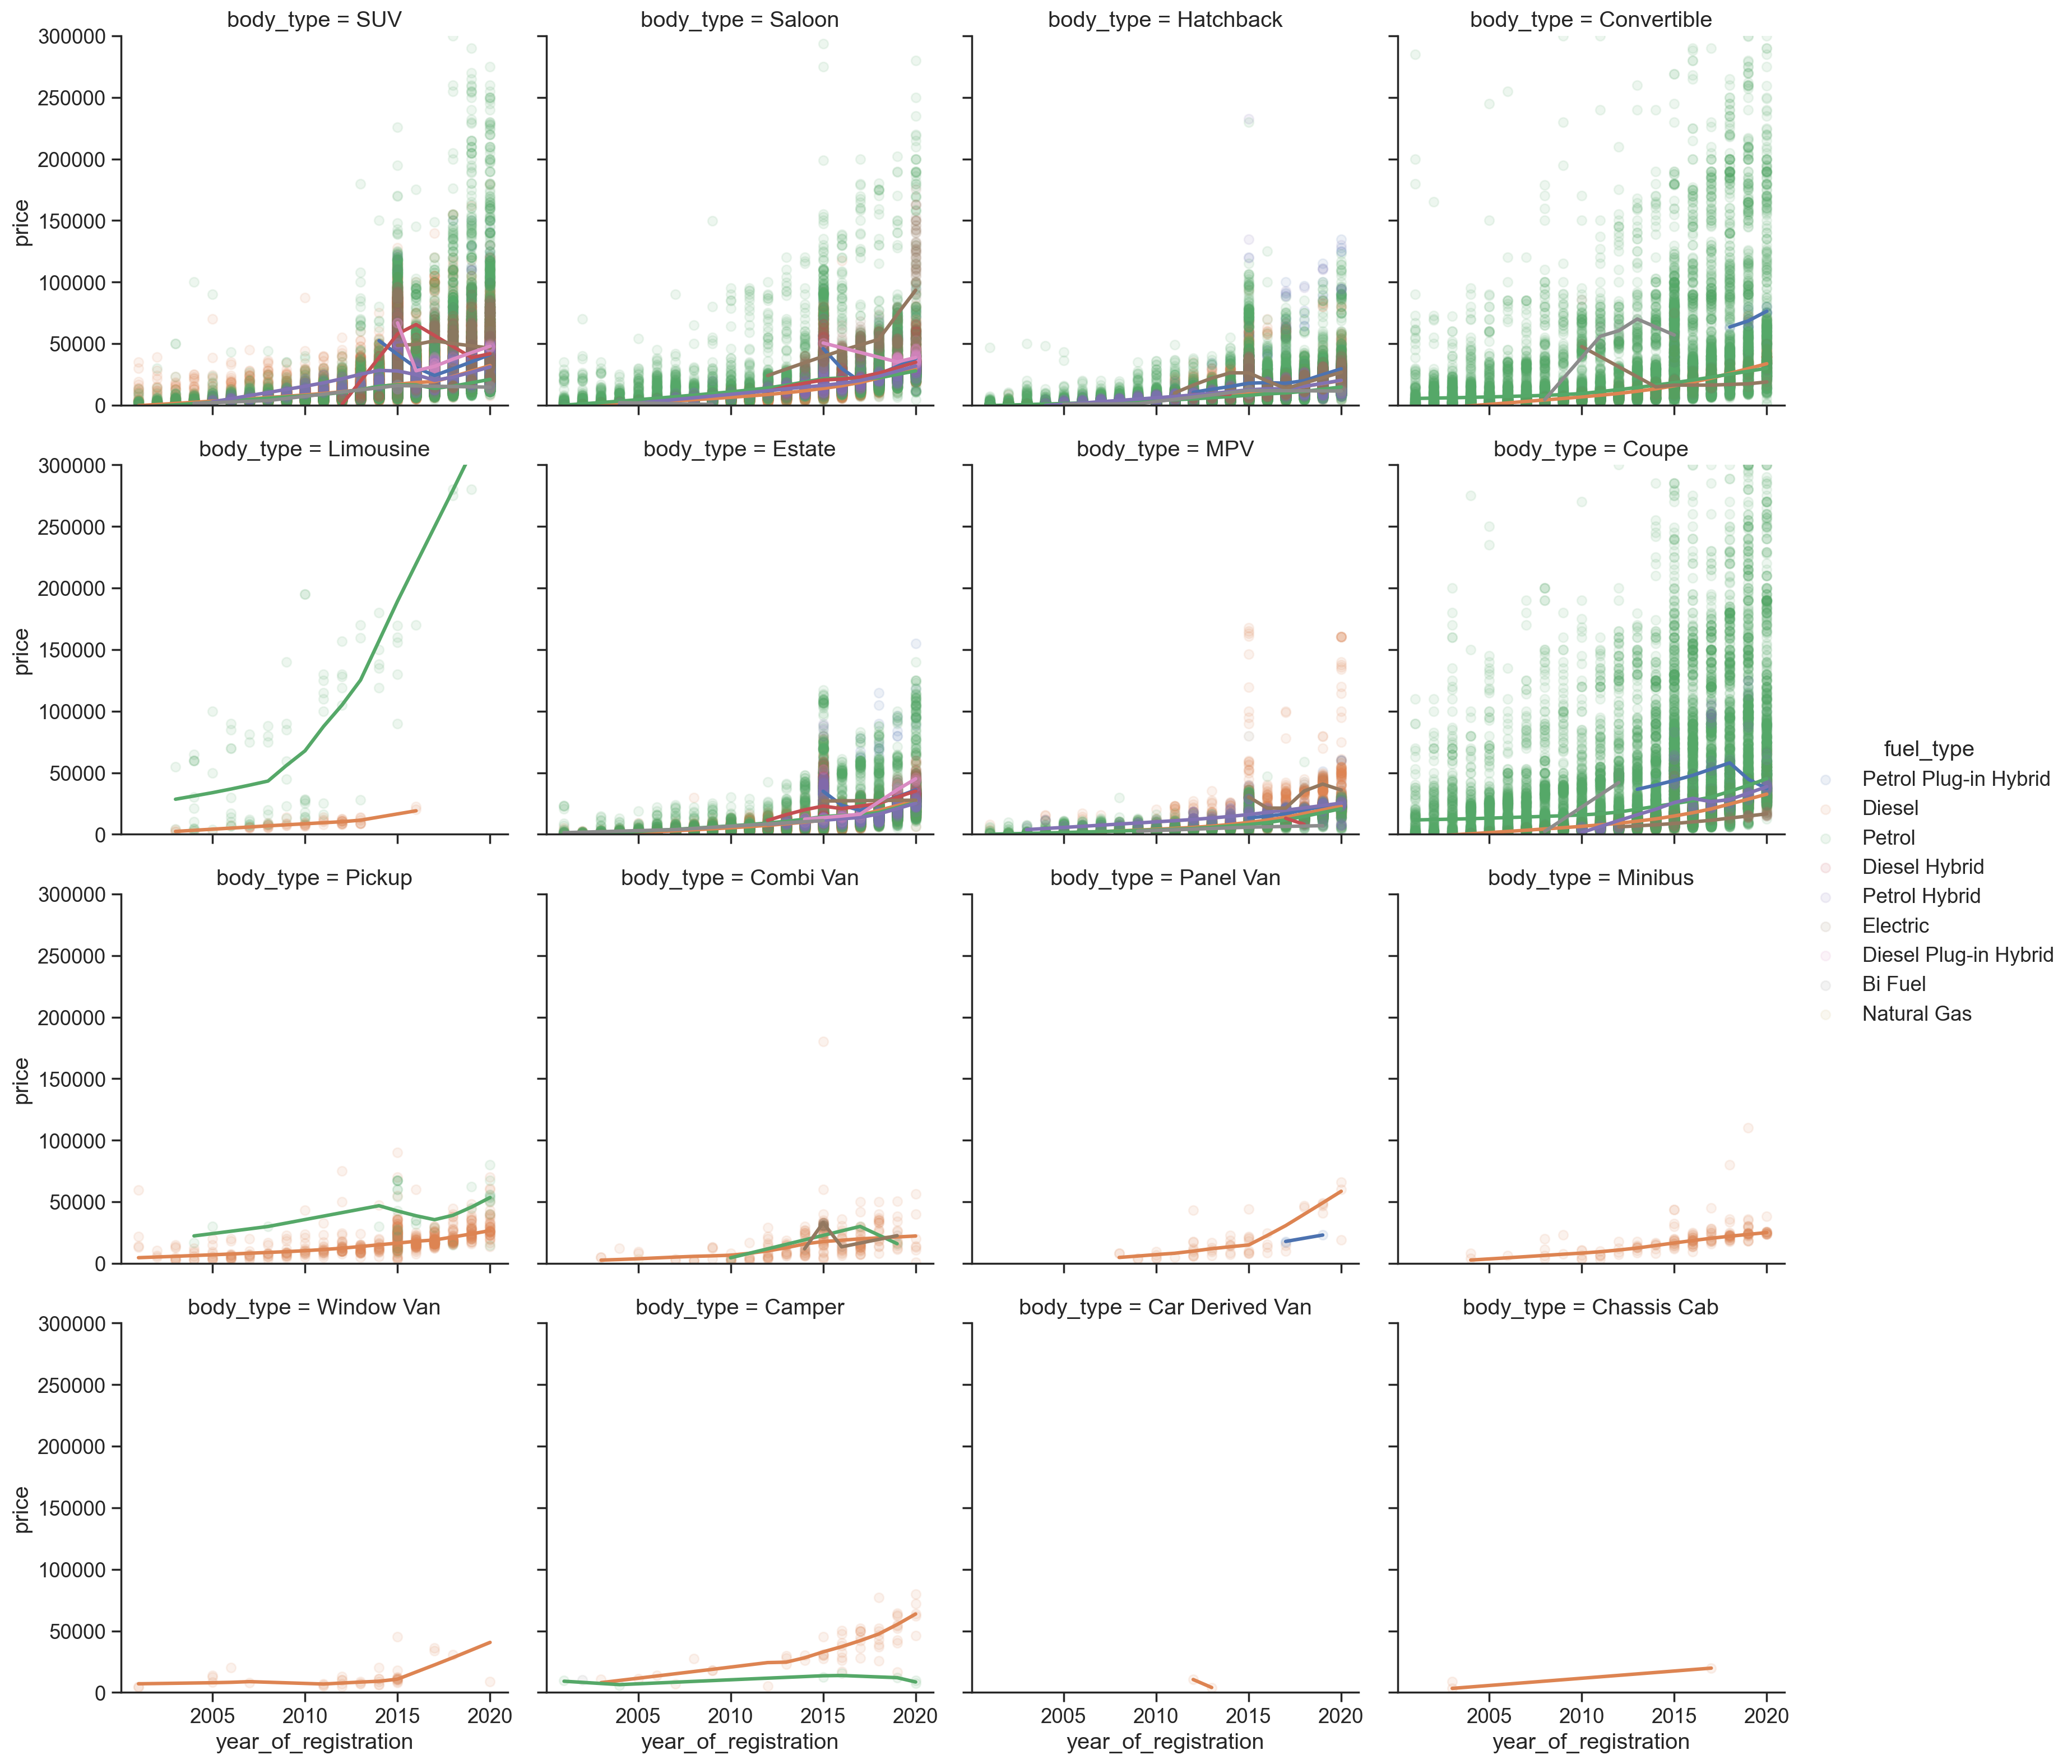

In [318]:
sns.lmplot(
    data=advert, x='year_of_registration', y='price',hue='fuel_type', col='body_type', col_wrap=4,
    scatter_kws=dict(alpha=0.1), height=4, lowess=True).set(ylim=(0,300000))